# FINAL PROJECT DATA SCIENCE TEAM


Project yang akan dikerjakan adalah memecahkan persoalan customer dari perusahaan Fashion E-commerce dimana customer banyak yang tidak kembali lagi ke platform untuk melakukan transaksi. Sehingga tim ds ditugaskan untuk menganalisa kejadian ini dengan membuat churn prediction model yang akan ditujukan oleh stakeholder yang ingin mengetahui probabilitas user terhadap churn pada satu bulan yang akan datang, serta mereka juga ingin mengetahui seberapa akurat model yang dibuat dikarenakan ini akan berdampak pada keputusan strategi yang akan dibuat tim marketing dan juga tim bisnis.

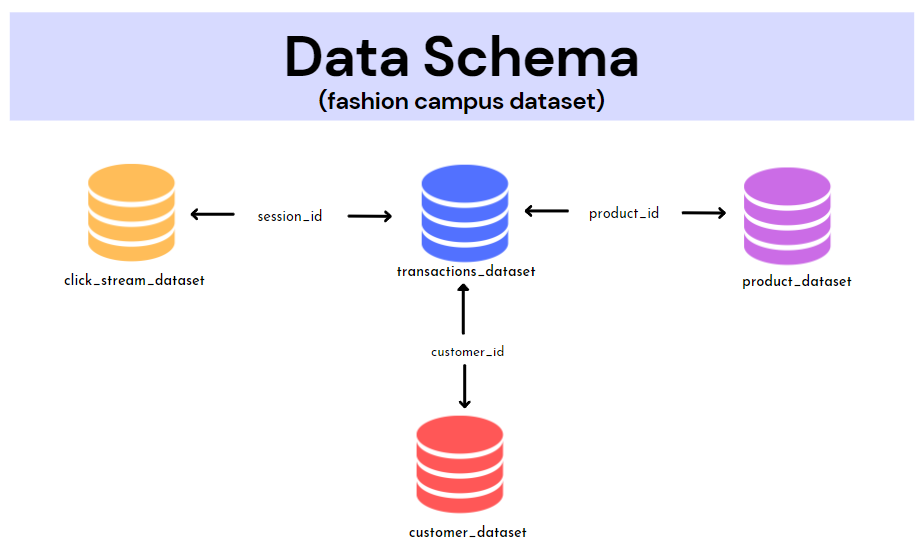

# Data Understanding

## Import library

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install squarify

In [3]:
# melakukan import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime as dt
import math
import json
from pandas.io.json import json_normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
# import squarify

## Read the dataset

data transaksi penjualan produk dan data click stream customer untuk periode 1 Januari 2020 sampai 31 Juli 2022 yang akan digunakan.

In [4]:
# membaca dataset csv

# product
df_product = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/product2.csv')
# df_product = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/product.csv',on_bad_lines='skip')

# customer
df_customer = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/customer.csv')

# click stream
df_click_stream = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/click_stream_jan20_jul22.csv')

# transaction
df_transactions = pd.read_csv('/content/drive/MyDrive/Final Project: Churn Customer Prediction/dataset/transaksi_jan20_jul22.csv')


In [5]:
import pandas as pd
transactions_2020_2022 = df_transactions[['customer_id', 'created_at','product_id']]
customer_data = df_customer[['customer_id','first_join_date']]

# Merge data based on customer ID or email
merged_data = pd.merge(customer_data, transactions_2020_2022, on='customer_id', how='left')

# Create a new column to identify customers who never made a transaction
merged_data['no_transaction'] = merged_data['created_at'].isnull()

# List of customers who registered but never made a transaction
non_transacting_customers = merged_data[merged_data['no_transaction']]

# Print the list or save it to a new CSV file
print(non_transacting_customers)


        customer_id first_join_date created_at  product_id  no_transaction
0              2870      2019-07-21        NaN         NaN            True
1              8193      2017-07-16        NaN         NaN            True
120           88813      2021-10-03        NaN         NaN            True
122            5440      2021-05-30        NaN         NaN            True
123           90319      2019-12-14        NaN         NaN            True
...             ...             ...        ...         ...             ...
971580        56781      2022-01-02        NaN         NaN            True
971622        20595      2021-08-01        NaN         NaN            True
971796        59948      2020-11-27        NaN         NaN            True
971856        64260      2021-06-29        NaN         NaN            True
972040        75597      2020-05-31        NaN         NaN            True

[53938 rows x 5 columns]


In [6]:
# pelanggan yang tidak pernah bertransaksi dari tahun 2016 sampai juli 2022
non_transacting_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53938 entries, 0 to 972040
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      53938 non-null  int64  
 1   first_join_date  53938 non-null  object 
 2   created_at       0 non-null      object 
 3   product_id       0 non-null      float64
 4   no_transaction   53938 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [7]:
# pelanggan yang tidak pernah bertransaksi yang mendaftar di platform pada rentang januari 2020 sampai juli 2022
filtered1_non_transacting_customer = non_transacting_customers[(non_transacting_customers['first_join_date'] >= '2020-01-01') & (non_transacting_customers['first_join_date'] <= '2022-07-31')]
filtered1_non_transacting_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28964 entries, 120 to 972040
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      28964 non-null  int64  
 1   first_join_date  28964 non-null  object 
 2   created_at       0 non-null      object 
 3   product_id       0 non-null      float64
 4   no_transaction   28964 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
# pelanggan yang tidak pernah bertransaksi yang mendaftar di platform pada rentang januari 2020 sampai juli 2022
filtered2_non_transacting_customer = non_transacting_customers[(non_transacting_customers['first_join_date'] >= '2016-01-01') & (non_transacting_customers['first_join_date'] <= '2019-12-31')]
filtered2_non_transacting_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24974 entries, 0 to 971577
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      24974 non-null  int64  
 1   first_join_date  24974 non-null  object 
 2   created_at       0 non-null      object 
 3   product_id       0 non-null      float64
 4   no_transaction   24974 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 999.9+ KB


In [9]:
# menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [10]:
df_customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

In [11]:
df_product.isnull().sum()

Unnamed: 0              0
id                      0
productGender           0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [12]:
df_transactions.isnull().sum()

Unnamed: 0                     0
created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                586895
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [13]:
df_click_stream.isnull().sum()

Unnamed: 0              0
session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    6299959
dtype: int64

In [14]:
# melihat info data setiap dataset
data = [df_product, df_customer, df_click_stream, df_transactions]

print('click_stream :\n', df_click_stream.shape)
print(df_click_stream.isnull().sum())

for i in data:
  print(i.info())

click_stream :
 (9381740, 7)
Unnamed: 0              0
session_id              0
event_name              0
event_time              0
event_id                0
traffic_source          0
event_metadata    6299959
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          44446 non-null  int64  
 1   id                  44446 non-null  int64  
 2   productGender       44446 non-null  object 
 3   masterCategory      44446 non-null  object 
 4   subCategory         44446 non-null  object 
 5   articleType         44446 non-null  object 
 6   baseColour          44431 non-null  object 
 7   season              44425 non-null  object 
 8   year                44445 non-null  float64
 9   usage               44129 non-null  object 
 10  productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(2), 

In [15]:
df_product.drop(['Unnamed: 0'],axis=1, inplace=True)
df_click_stream.drop(['Unnamed: 0'],axis=1, inplace=True)
df_transactions.drop(['Unnamed: 0'], axis=1, inplace=True)

In [16]:
df_customer.describe(include='object')

,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location,home_country,first_join_date
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,707,173,100000,100000,2,13003,2,100000,86,33,1,2223
top,Rahmi,Susanti,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1999-07-31,Android,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,Android 2.2.2,Jakarta Raya,Indonesia,2021-07-31
freq,560,1028,1,1,64230,54,76637,1,1296,18715,100000,341


In [17]:
# melihat data customer
df_customer.head(15)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11
5,5440,Nadia,Suartini,7bb470a0-4824-4b2c-8754-b45d98c6fa1c,7bb470a0_4824_4b2c_8754_b45d98c6fa1c@startupca...,F,1989-01-09,Android,bcb06a05-2535-4838-bd63-529528268037,Android 4.0.4,-6.277891,106.786538,Jakarta Raya,Indonesia,2021-05-30
6,90319,Banara,Wijaya,79c0c343-3ef3-4862-8f4d-591dbd9a8870,79c0c343_3ef3_4862_8f4d_591dbd9a8870@zakyfound...,M,1990-01-12,Android,4c110df9-59b6-471d-87eb-fd45c0f2868d,Android 8.1.0,0.869352,103.873668,Kepulauan Riau,Indonesia,2019-12-14
7,96453,Talia,Hastuti,44e67d0f-4743-479c-a74b-fc853ea5b355,44e67d0f_4743_479c_a74b_fc853ea5b355@startupca...,F,2005-02-12,Android,eba4a196-7133-4da6-a2b4-d153541edc5b,Android 4.2,-3.908257,102.486909,Bengkulu,Indonesia,2022-01-09
8,8031,Ana,Laksmiwati,c5969dbf-c32b-428c-b8f4-a430def3befd,c5969dbf_c32b_428c_b8f4_a430def3befd@zakyfound...,F,1995-11-01,iOS,17545c14-a543-43ab-8e30-f9195f0336f0,iPad; CPU iPad OS 10_3_3 like Mac OS X,-6.974594,107.634488,Jawa Barat,Indonesia,2019-09-12
9,61533,Adiarja,Utama,57497894-0738-4bcd-8839-f56cfc179ebc,57497894_0738_4bcd_8839_f56cfc179ebc@startupca...,M,1987-02-28,Android,95a24899-f5f1-433e-ac5d-4f8b28c7ca39,Android 4.0.1,-8.386214,120.665656,Nusa Tenggara Timur,Indonesia,2020-01-27


In [18]:
# melihat data pada produk
df_product.head(1000)

,id,productGender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
995,48911,Women,Accessories,Jewellery,Pendant,Silver,Summer,2013.0,Casual,Lucera Women Silver Pendant with Chain
996,29926,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Police Men Black Dial Watch PL12778MSU-61
997,42417,Unisex,Accessories,Accessories,Messenger Bag,Purple,Summer,2012.0,Casual,American Tourister Unisex Purple Messenger Bag
998,3730,Men,Apparel,Topwear,Tshirts,Yellow,Summer,2011.0,Sports,CSK Mens Fangear Yellow Jersey


In [19]:
df_transactions['payment_status'].value_counts()

Success    878830
Failed      39284
Name: payment_status, dtype: int64

In [20]:
df_transactions.describe(include='int')

,customer_id,promo_amount,shipment_fee,total_amount,product_id,quantity,item_price
count,918114.000000,918114.000000,918114.000000,9.181140e+05,918114.000000,918114.000000,9.181140e+05
mean,49845.484262,1924.770308,9204.695713,1.184215e+06,29700.941167,1.475094,2.501242e+05
std,29103.028724,3015.775696,9387.890600,1.738389e+06,17057.015658,1.591763,1.118945e+05
min,3.000000,0.000000,0.000000,1.089800e+04,1163.000000,1.000000,8.166000e+03
25%,24380.000000,0.000000,0.000000,2.469702e+05,14768.000000,1.000000,1.684920e+05
50%,49667.000000,0.000000,10000.000000,4.563815e+05,28609.000000,1.000000,2.337295e+05
75%,75188.000000,3765.000000,10000.000000,1.364554e+06,44698.000000,1.000000,3.139140e+05
max,99998.000000,24519.000000,50000.000000,2.350449e+07,60000.000000,43.000000,1.200357e+06


In [21]:
# melihat data pada transaksi
df_transactions.head(50)

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2020-02-14T11:48:03.365620Z,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,"{'product_id': 35062, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2020-02-18T19:40:48.027858Z,-0.703569,112.148769,2108413,35062,1,367216
1,2020-02-14T11:48:03.365620Z,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,"{'product_id': 15035, 'quantity': 2, 'item_pri...",Credit Card,Success,0,NaN,10000,2020-02-18T19:40:48.027858Z,-0.703569,112.148769,2108413,15035,2,150796
2,2020-02-14T11:48:03.365620Z,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,"{'product_id': 12298, 'quantity': 8, 'item_pri...",Credit Card,Success,0,NaN,10000,2020-02-18T19:40:48.027858Z,-0.703569,112.148769,2108413,12298,8,157414
3,2020-02-14T11:48:03.365620Z,4774,1a291e3e-503f-4780-97f0-7a76301157c0,b440b87a-c328-4b8d-b6eb-1b3aa8c836b3,"{'product_id': 7319, 'quantity': 1, 'item_pric...",Credit Card,Success,0,NaN,10000,2020-02-18T19:40:48.027858Z,-0.703569,112.148769,2108413,7319,1,170293
4,2020-04-01T11:56:48.365620Z,4774,b60b524e-f624-41d1-8984-febfd5d0097e,42e91872-d1d5-44a5-925f-8532cee92d37,"{'product_id': 43820, 'quantity': 1, 'item_pri...",Credit Card,Success,5911,AZ2022,5000,2020-04-07T01:10:52.225190Z,-3.602334,120.363824,464824,43820,1,281930
5,2020-04-01T11:56:48.365620Z,4774,b60b524e-f624-41d1-8984-febfd5d0097e,42e91872-d1d5-44a5-925f-8532cee92d37,"{'product_id': 39609, 'quantity': 1, 'item_pri...",Credit Card,Success,5911,AZ2022,5000,2020-04-07T01:10:52.225190Z,-3.602334,120.363824,464824,39609,1,44132
6,2020-04-01T11:56:48.365620Z,4774,b60b524e-f624-41d1-8984-febfd5d0097e,42e91872-d1d5-44a5-925f-8532cee92d37,"{'product_id': 41455, 'quantity': 1, 'item_pri...",Credit Card,Success,5911,AZ2022,5000,2020-04-07T01:10:52.225190Z,-3.602334,120.363824,464824,41455,1,139673
7,2020-05-18T11:32:10.365620Z,4774,8639711c-2cc9-47f8-b710-82f9a31e0005,3837b92e-e638-498c-b29b-2dc349da8a13,"{'product_id': 19341, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2020-05-20T16:22:38.995669Z,-6.277846,107.429749,374701,19341,1,364701
8,2020-07-04T11:04:04.365620Z,4774,2bf9211f-c9f9-4383-8d88-8441985e6c19,36e1c9a4-b10c-4815-aec7-261366394bfc,"{'product_id': 17601, 'quantity': 1, 'item_pri...",Debit Card,Success,0,NaN,5000,2020-07-09T20:04:25.162317Z,-3.602334,120.363824,126784,17601,1,121784
9,2020-08-20T11:41:15.365620Z,4774,784746bd-9adb-4c82-98f1-b51eeff756dc,e1a22441-74b7-409a-87eb-85b3192e5bed,"{'product_id': 43711, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2020-08-22T13:13:38.147668Z,-0.631714,110.620710,175789,43711,1,165789


In [22]:
# melihat data pada click stream
df_click_stream.head(200)

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,57450e55-19b2-4633-a527-dfe93f5c65c4,HOMEPAGE,2020-01-07T13:48:05.425431Z,a53d8b8b-857e-48e0-8a03-dbab4a1df74e,MOBILE,NaN
1,57450e55-19b2-4633-a527-dfe93f5c65c4,ADD_TO_CART,2020-01-07T13:57:04.425431Z,2119e985-ac1c-4c6e-bfcc-26040fbc1a67,MOBILE,"{'product_id': 30145, 'quantity': 1, 'item_pri..."
2,57450e55-19b2-4633-a527-dfe93f5c65c4,ADD_PROMO,2020-01-07T14:06:41.425431Z,2213a360-774a-4c71-94d4-939152e84990,MOBILE,"{'promo_code': 'BUYMORE', 'promo_amount': 6961}"
3,57450e55-19b2-4633-a527-dfe93f5c65c4,BOOKING,2020-01-07T14:36:15.425431Z,b9fe3c54-f72c-4590-bf33-9dcc4694475e,MOBILE,{'payment_status': 'Success'}
4,57450e55-19b2-4633-a527-dfe93f5c65c4,CLICK,2020-01-07T13:58:01.425431Z,145c79e9-edbb-403f-b4c6-a260919b0d95,MOBILE,NaN
...,...,...,...,...,...,...
195,eff91d58-cb06-4326-9c77-16e461f25fa2,HOMEPAGE,2020-03-04T18:44:04.425431Z,ab499fb1-1667-4fe8-abeb-7005ccc99759,MOBILE,NaN
196,eff91d58-cb06-4326-9c77-16e461f25fa2,CLICK,2020-03-04T19:07:12.425431Z,5bbb7905-2a1c-49da-815b-cabdc78518cd,MOBILE,NaN
197,eff91d58-cb06-4326-9c77-16e461f25fa2,SCROLL,2020-03-04T19:29:25.425431Z,5f020d75-4a52-42aa-9dd0-d693e5d8ac18,MOBILE,NaN
198,eff91d58-cb06-4326-9c77-16e461f25fa2,HOMEPAGE,2020-03-04T19:52:22.425431Z,2c951ec0-00d1-4506-ac0d-af04da5b3d10,MOBILE,NaN


## Melakukan Exploratory Data Analysis (EDA)

### Eksplorasi Data Click Stream

In [23]:
#Add columns
df_click_stream['event_year'] = pd.to_datetime(df_click_stream['event_time']).dt.year
df_click_stream['event_month'] = pd.to_datetime(df_click_stream['event_time']).dt.month

In [24]:
# melihat data unik di kolom event name
df_click_stream['event_name'].value_counts()


CLICK          1847977
HOMEPAGE       1821051
ADD_TO_CART    1360039
SCROLL         1237553
ITEM_DETAIL     957023
SEARCH          874907
BOOKING         623717
PROMO_PAGE      436355
ADD_PROMO       223118
Name: event_name, dtype: int64

Text(0.5, 1.0, 'Top Event')

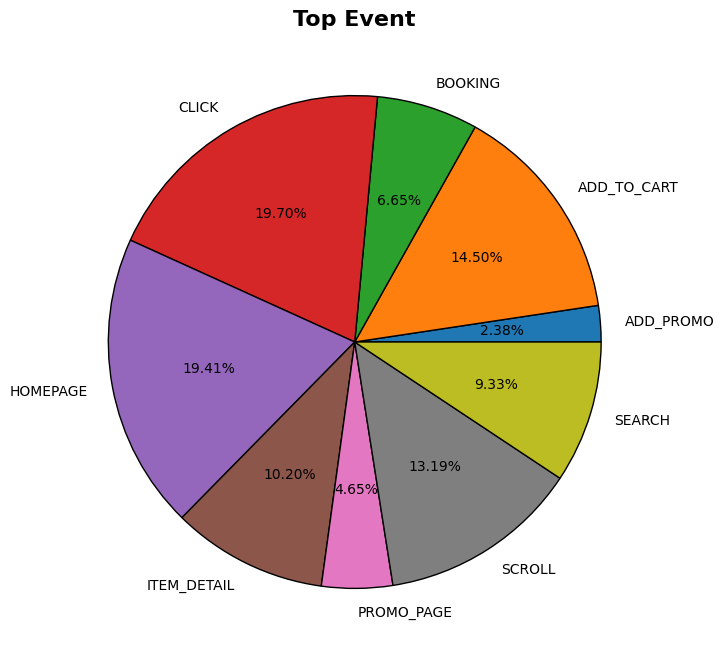

In [25]:
top_event = df_click_stream.groupby('event_name')['event_id'].count().reset_index()
top_event = top_event.rename(columns = {'event_id' : 'total_event'})

plt.figure(figsize = (8, 8))
plt.pie(data = top_event, x = 'total_event', labels = 'event_name', autopct = '%1.2f%%', wedgeprops = {'edgecolor' : 'black'})
plt.title('Top Event', fontweight = 'bold', fontdict = {'fontsize' : 16})

Terdapat 9 event yang bisa dilakukan pelanggan. Dari ===== event, event yang paling banyak dilakukan pertama adalah click (20.92%), kedua adalah homepage (19.21%), dan ketiga adalah add to cart (11.64%).

Text(0.5, 1.0, 'Comparison between Specific Events (Jan - Jul)')

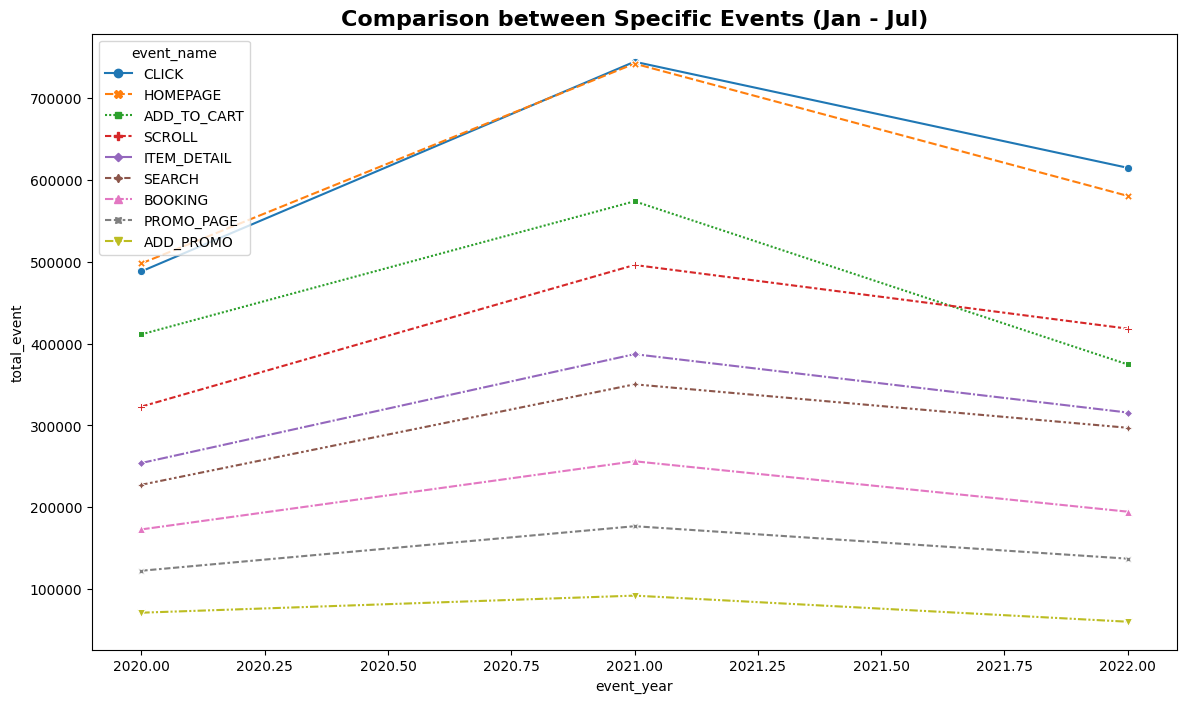

In [26]:
month17 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
event = df_click_stream['event_name'].unique()

top_event_year = df_click_stream[df_click_stream['event_month'].isin(month17)]
top_event_year = top_event_year[top_event_year['event_name'].isin(event)].groupby(['event_year', 'event_name'])['event_id'].count().reset_index()
top_event_year = top_event_year.rename(columns = {'event_id' : 'total_event'})
top_event_year = top_event_year.sort_values('total_event', ascending = False)

plt.figure(figsize = (14, 8))
sns.lineplot(data = top_event_year, x = 'event_year', y = 'total_event', hue = 'event_name', style = 'event_name', markers = True)
plt.title('Comparison between Specific Events (Jan - Jul)', fontweight = 'bold', fontdict = {'fontsize' : 16})

Dari tahun 2016 sampai 2021, tiap eventnya selalu mengalami peningkatan. Untuk tahun 2022 menurun karena pada datanya baru mencapai bulan juli 2022. Peningkatan yang sangat besar terjadi pada tahun 2020 dan 2021. Kemungkinan besar hal tersebut dapat terjadi karena banyak pelanggan yang aktif dan gabung pada masa COVID-19.

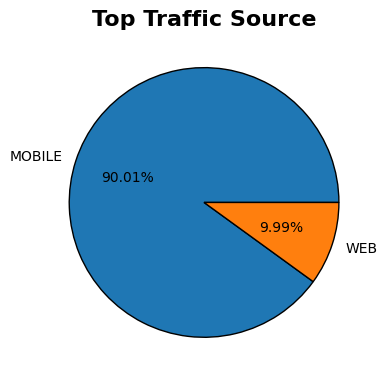

In [27]:
top_traffic = df_click_stream.groupby('traffic_source')['event_id'].count().reset_index()
top_traffic = top_traffic.rename(columns = {'event_id' : 'total_traffic'})

plt.figure(figsize = (4, 4))
plt.pie(data = top_traffic, x = 'total_traffic', labels = 'traffic_source', autopct = '%1.2f%%', wedgeprops = {'edgecolor' : 'black'})
plt.title('Top Traffic Source', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.tight_layout()

Terdapat 2 traffic source saja yaitu melalui mobile dan web. Berdasarkan chart diatas, traffic terbanyak melalui penggunaan mobile dengan persentase 90% atau sebanyak 11.548.304.

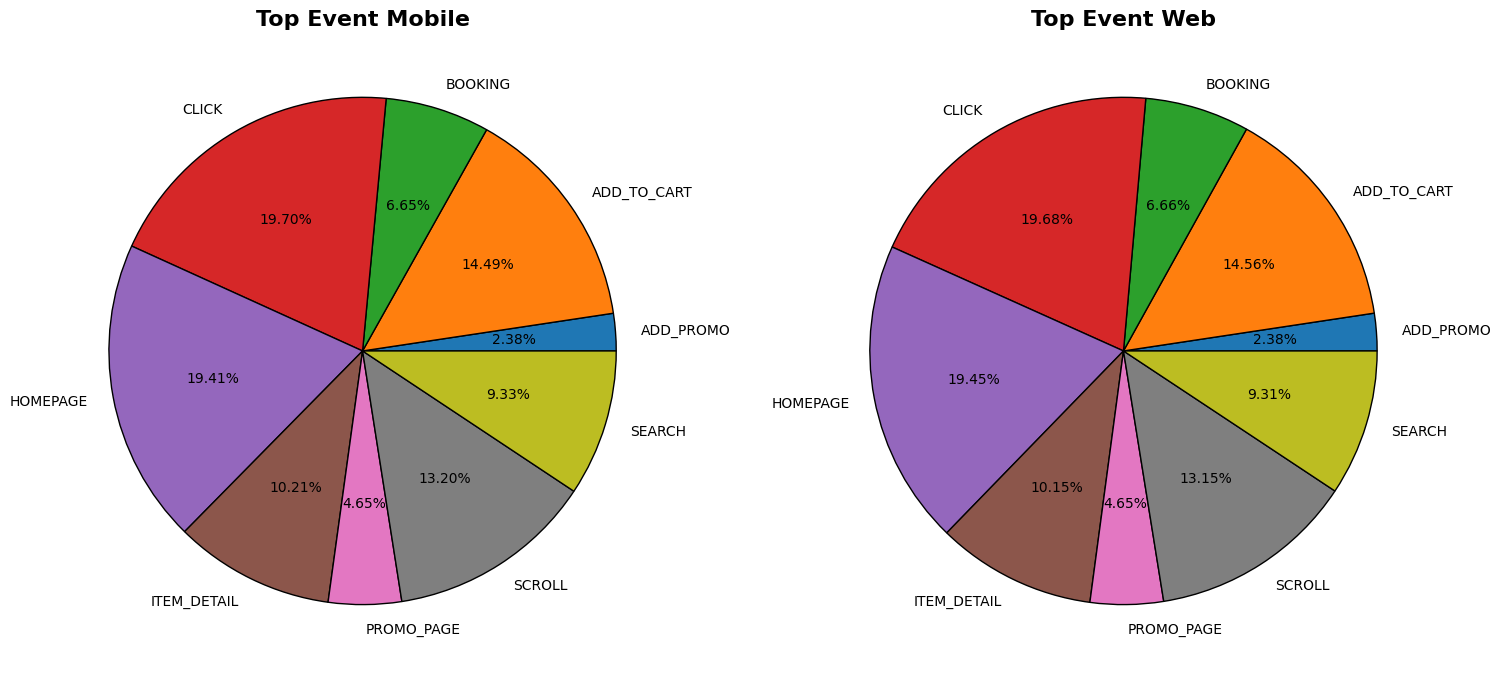

In [28]:
top_event_mobile = df_click_stream[df_click_stream['traffic_source'] == 'MOBILE'].groupby('event_name')['event_id'].count().reset_index()
top_event_mobile = top_event_mobile.rename(columns = {'event_id' : 'total_event'})

top_event_web = df_click_stream[df_click_stream['traffic_source'] == 'WEB'].groupby('event_name')['event_id'].count().reset_index()
top_event_web = top_event_web.rename(columns = {'event_id' : 'total_event'})

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 10))

ax1.pie(data = top_event_mobile, x = 'total_event', labels = 'event_name', autopct = '%1.2f%%', wedgeprops = {'edgecolor':'black'})
ax1.set_title('Top Event Mobile', fontweight = 'bold', size = 16)

ax2.pie(data = top_event_web, x = 'total_event', labels = 'event_name', autopct = '%1.2f%%', wedgeprops = {'edgecolor':'black'})
ax2.set_title('Top Event Web', fontweight = 'bold', size = 16)

plt.show()

Baik dari traffic source mobile dan web memiliki event yang sama.

Text(0.5, 1.0, 'Top 10 Search Keywords')

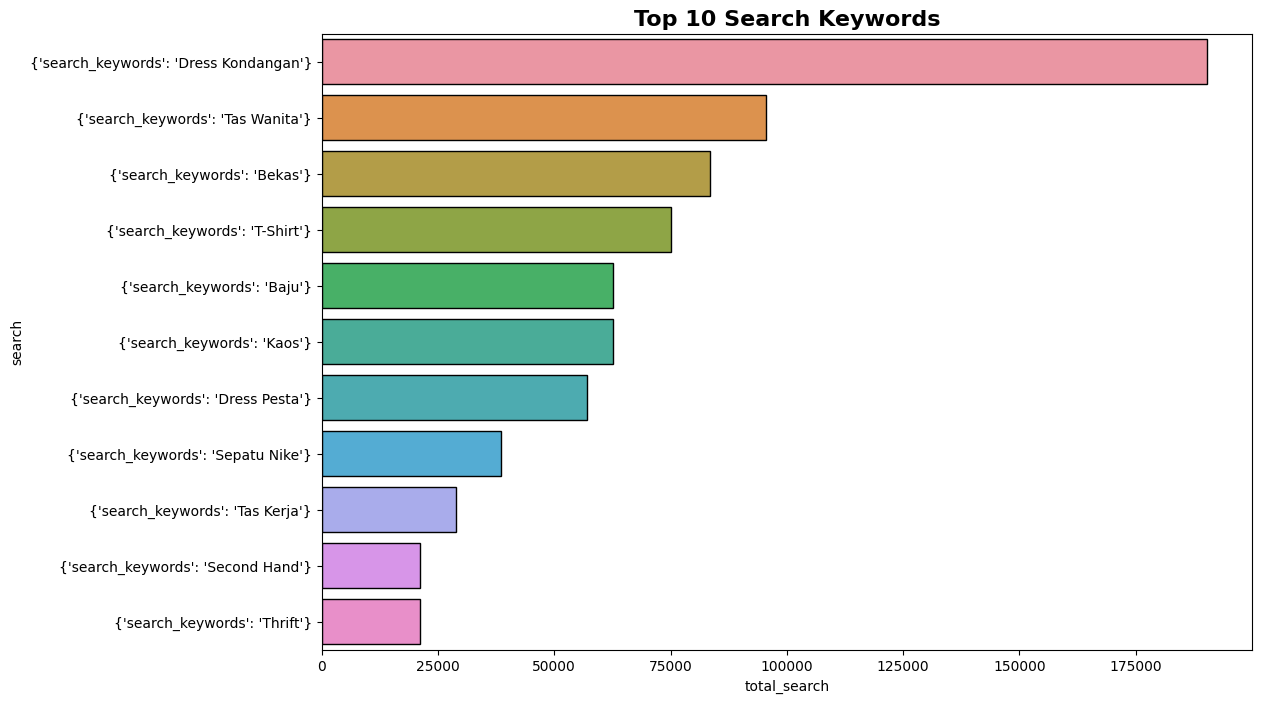

In [29]:
top_search = df_click_stream[df_click_stream['event_name'] == 'SEARCH']['event_metadata'].value_counts()[:11].reset_index()
top_search = top_search.rename(columns = {'index' : 'search', 'event_metadata' : 'total_search'})

plt.figure(figsize = (12, 8))
sns.barplot(data = top_search, x = 'total_search', y = 'search', edgecolor = 'black')
plt.title('Top 10 Search Keywords', fontweight = 'bold', fontdict = {'fontsize' : 16})

Grafik diatas menjelaskan mengenai keywords yang paling banyak dicari dari tahun 2016 sampai 2022. Pencarian terbanyak yang dicari oleh pelanggan adalah dress kondangan dengan total 256.194. Pencarian terbanyak kedua adalah tas wanita dengan total 128.790. Dan ketiga pencarian terbanyak adalah bekas dengan total 112.269. Grafik ini dapat menjadi saran bagi fashion campus untuk menyiapkan produk sesuai pencarian diatas karena banyak pelanggan yang mencari.

Text(0.5, 1.0, 'Top 3 Search Keywords Every Year')

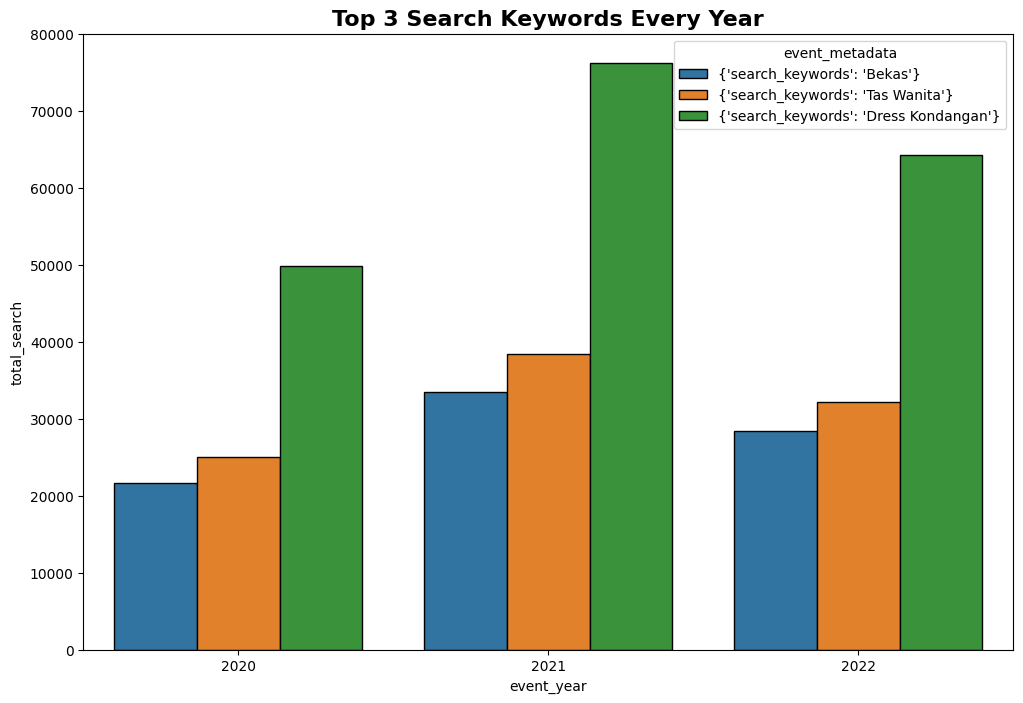

In [30]:
top_search_year = df_click_stream[df_click_stream['event_name'] == 'SEARCH'].groupby(['event_year', 'event_metadata'])['event_id'].count().reset_index()
top_search_year = top_search_year.rename(columns = {'event_id' : 'total_search'})
top_search_year = top_search_year[top_search_year['event_metadata'].isin(top_search['search'][:3])]
top_search_year = top_search_year.sort_values('total_search', ascending = True)

plt.figure(figsize = (12, 8))
sns.barplot(data = top_search_year, x = 'event_year', y = 'total_search', hue = 'event_metadata', edgecolor = 'black')
plt.title('Top 3 Search Keywords Every Year', fontweight = 'bold', fontdict = {'fontsize' : 16})

Berikut top 3 pencarian terbanyak dari tahun 2016 hingga 2022. Pencarian dress kondangan mengalami peningkatan yang besar tiap tahunnya terutama pada tahun 2021. Diperkirakan tahun 2022 pencarian dress kondangan bisa lebih banyak lagi karena pada data click stream baru mencapai bulan juli 2022.

In [31]:
# clickstream different event_name with column name (event) and (jumlah_total)
events = pd.DataFrame(df_click_stream['event_name'].value_counts().reset_index().rename(columns={'index':'event', 'event_name':'jumlah_total'}))

# add percentage two digit after comma (persentase_jumlah_total)
# events['persentase_jumlah_total'] = events['jumlah_total'].apply(lambda x: "{:.2f}%".format(x/df_events['jumlah_total'].sum()*100))
events['persentase_jumlah_total'] = events['jumlah_total'].apply(lambda x: "{:.2f}%".format(x/events['jumlah_total'].sum()*100))

# add count customer_id with transactions (jumlah_customer)
events['jumlah_customer'] = events['event'].apply(lambda x: df_transactions.merge(df_click_stream[df_click_stream['event_name'] == x] , how = 'inner', on = 'session_id')['customer_id'].nunique())

# add percentage two digit after comma (persentase_jumlah_customer)
events['persentase_jumlah_customer'] = events['jumlah_customer'].apply(lambda x: "{:.2f}%".format(x/df_customer['customer_id'].count()*100))

events

,event,jumlah_total,persentase_jumlah_total,jumlah_customer,persentase_jumlah_customer
0,CLICK,1847977,19.70%,42232,42.23%
1,HOMEPAGE,1821051,19.41%,45546,45.55%
2,ADD_TO_CART,1360039,14.50%,45661,45.66%
3,SCROLL,1237553,13.19%,40214,40.21%
4,ITEM_DETAIL,957023,10.20%,39715,39.72%
5,SEARCH,874907,9.33%,38048,38.05%
6,BOOKING,623717,6.65%,46061,46.06%
7,PROMO_PAGE,436355,4.65%,35236,35.24%
8,ADD_PROMO,223118,2.38%,34674,34.67%


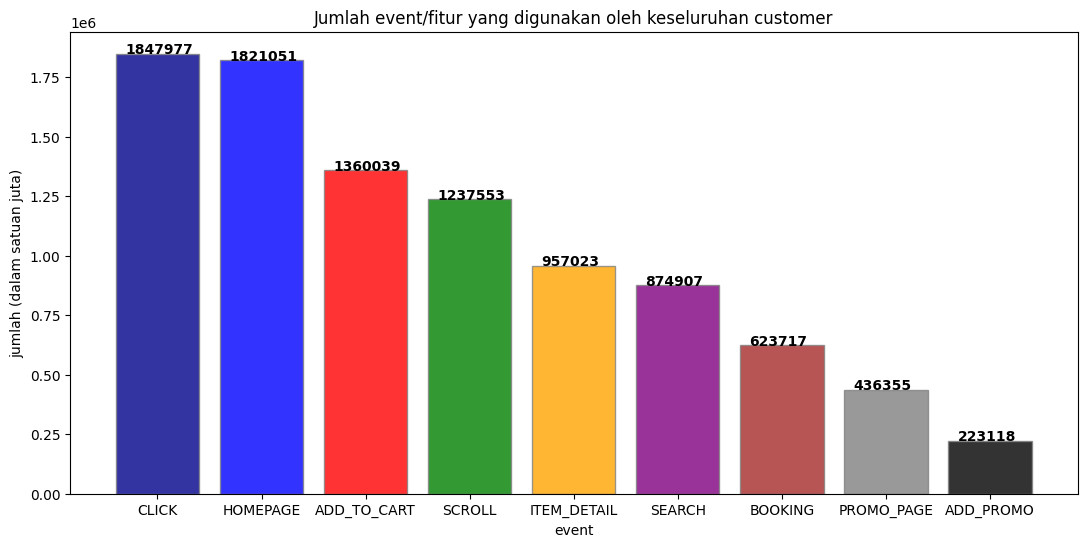

In [32]:
# plot jumlah total 'event' clicked
fig, ax = plt.subplots(figsize = (13, 6))

plt.bar(events['event'], events['jumlah_total'], color = ['darkblue', 'blue', 'red', 'green', 'orange', 'purple', 'brown', 'grey', 'black'], linewidth = 1,
        edgecolor = 'gray', alpha = 0.8)


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.089, i.get_height()+0.2, str(round((i.get_height()), 2)), fontsize = 10, fontweight ='bold', color ='black')

# Add x, y gridlines
#ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.title('Jumlah event/fitur yang digunakan oleh keseluruhan customer')
plt.xlabel('event')
plt.ylabel('jumlah (dalam satuan juta)')
# plt.xticks(rotation=90)

plt.show()

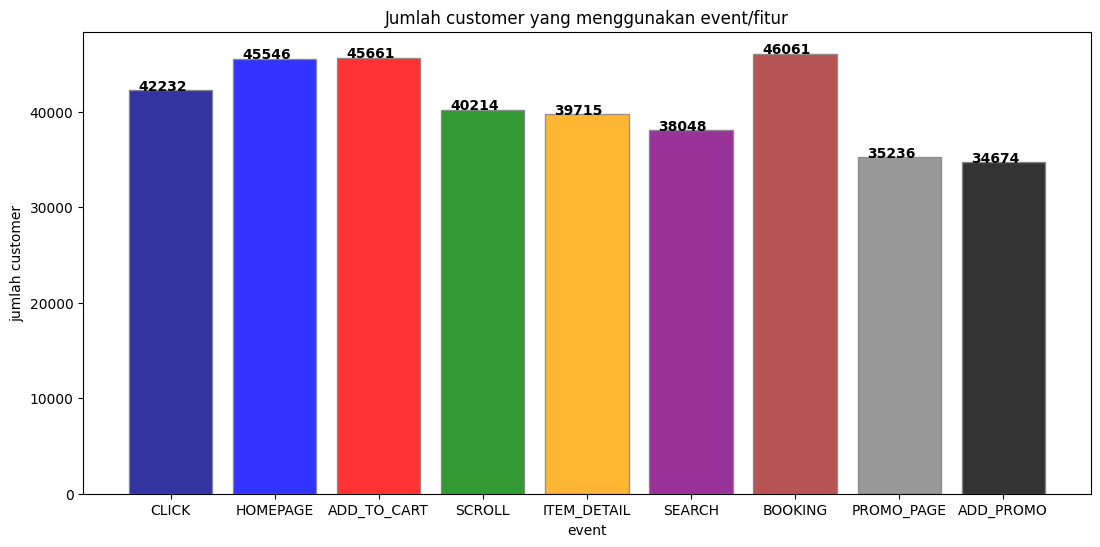

In [33]:
# plot customer
fig, ax = plt.subplots(figsize = (13, 6))

plt.bar(events['event'], events['jumlah_customer'], color = ['darkblue', 'blue', 'red', 'green', 'orange', 'purple', 'brown', 'grey', 'black'], linewidth = 1,
        edgecolor = 'gray',  alpha = 0.8)


# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_x()+0.089, i.get_height()+0.2, str(round((i.get_height()), 2)), fontsize = 10, fontweight ='bold', color ='black')

# Add x, y gridlines
#ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

plt.title('Jumlah customer yang menggunakan event/fitur')
plt.xlabel('event')
plt.ylabel('jumlah customer')
# plt.xticks(rotation=90)

plt.show()


Jumlah pelanggan yang melakukan booking hanya 1/2 dari keseluruhan pelanggan.

In [34]:
event_add_to_cart = df_click_stream[df_click_stream['event_name'] == 'ADD_TO_CART']
total_add_to_cart = event_add_to_cart.groupby(['session_id'])['event_name'].count().reset_index().rename(columns = {'event_name' : 'total_add_to_cart'})

event_booking = df_click_stream[df_click_stream['event_name'] == 'BOOKING']
total_booking = event_booking.groupby(['session_id'])['event_name'].count().reset_index().rename(columns = {'event_name' : 'total_booking'})

total_checkout = total_add_to_cart.merge(right = total_booking, how = 'outer', on = 'session_id')
customer_transaction = df_customer[['customer_id']].merge(right = df_transactions[['customer_id', 'session_id']], how = 'outer', on = 'customer_id')
checkout_rate =  customer_transaction.merge(right = total_checkout, how = 'right', on = 'session_id')
checkout_rate = checkout_rate.groupby(['customer_id']).agg({'total_add_to_cart' : 'sum', 'total_booking' : 'sum'}).reset_index()
checkout_rate = checkout_rate.merge(right = df_customer[['customer_id', 'gender', 'home_location']], how = 'outer', on = 'customer_id')
checkout_rate = checkout_rate.fillna(0)

In [35]:
checkout_rate_gender = checkout_rate.groupby(['gender']).agg({'customer_id' : 'count', 'total_add_to_cart' : 'sum', 'total_booking' : 'sum'}).reset_index().rename(columns = {'customer_id' : 'total_customer'})
checkout_rate_gender['checkout_rate'] = checkout_rate_gender['total_booking'] / checkout_rate_gender['total_add_to_cart']
checkout_rate_gender

,gender,total_customer,total_add_to_cart,total_booking,checkout_rate
0,F,64230,2273757.0,588580.0,0.258858
1,M,35770,1274721.0,329527.0,0.258509


Pelanggan wanita jumlahnya lebih banyak dan checkout ratenya lebih besar dari pria. Sepertinya pria banyak tidak jadi membeli karena harga (?).

In [36]:
checkout_rate_home_location = checkout_rate.groupby(['home_location']).agg({'customer_id' : 'count', 'total_add_to_cart' : 'sum', 'total_booking' : 'sum'}).reset_index().rename(columns = {'customer_id' : 'total_customer'})
checkout_rate_home_location['checkout_rate'] = checkout_rate_home_location['total_booking'] / checkout_rate_home_location['total_add_to_cart']
checkout_rate_home_location = checkout_rate_home_location.sort_values(by = 'checkout_rate', ascending = False)
checkout_rate_home_location

,home_location,total_customer,total_add_to_cart,total_booking,checkout_rate
27,Sulawesi Tenggara,246,5596.0,1781.0,0.318263
3,Banten,377,11640.0,3354.0,0.288144
20,Nusa Tenggara Timur,587,18274.0,5190.0,0.284010
26,Sulawesi Tengah,505,12447.0,3533.0,0.283843
21,Papua,753,25782.0,7216.0,0.279885
15,Kepulauan Riau,1902,68433.0,18814.0,0.274926
24,Sulawesi Barat,1068,30905.0,8437.0,0.272998
13,Kalimantan Tengah,4091,147746.0,39945.0,0.270363
4,Bengkulu,654,22379.0,6019.0,0.268958
0,Aceh,263,9871.0,2654.0,0.268868


Lokasi rumah di pulau Jawa seperti Jakarta, Jawa Barat, dll memiliki pelanggan hingga 10ribuan namun checkout ratenya tergolong rendah. Sepertinya karena banyak persaingan, pelanggan lebih memilih berbelanja di tempat lain.

### Eksplorasi Data Customer

In [37]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [38]:
df_customer.describe()

,customer_id,home_location_lat,home_location_long
count,100000.000000,100000.000000,100000.000000
mean,50000.500000,-5.106390,110.936081
std,28867.657797,3.088183,6.343363
min,1.000000,-10.845002,95.275319
25%,25000.750000,-7.372650,106.860628
50%,50000.500000,-6.240087,110.162010
75%,75000.250000,-3.092254,113.171187
max,100000.000000,5.818355,140.993119


In [39]:
# membuat kolom baru

# age (umur)
df_customer['age'] = pd.to_datetime(df_transactions['created_at'].max()).year - pd.to_datetime(df_customer['birthdate']).dt.year

# age range (rentang umur)
conditions = [
    (df_customer['age'] < 12),
    (df_customer['age']>=12) & (df_customer['age']<=16),
    (df_customer['age']>=17) & (df_customer['age']<=25),
    (df_customer['age']>=26) & (df_customer['age']<=35),
    (df_customer['age']>=36) & (df_customer['age']<=45),
    (df_customer['age']>=46) & (df_customer['age']<=55),
    (df_customer['age']>=56) & (df_customer['age']<=65),
    (df_customer['age']>65)
]

range = ['<12','12-16','17-25','26-35','36-45','46-55','56-65','>65']
df_customer['age_range'] = np.select(conditions, range)

#Account Length
df_customer['account_length'] = (pd.to_datetime('20220731', format = '%Y-%m-%d') - pd.to_datetime(df_customer['birthdate'])).astype('timedelta64[M]').astype('int')

# #First Join Year
df_customer['first_join_year'] = pd.to_datetime(df_customer['first_join_date']).dt.year

# region (wilayah)
def region(x):
  if x in ['Papua', 'Papua Barat']:
    return 'Papua'
  elif x in ['Maluku', 'Maluku Utara']:
    return 'Kepulauan Maluku'
  elif x in ['Sulawesi Tengah', 'Gorontalo', 'Sulawesi Utara', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Sulawesi Barat']:
    return 'Sulawesi'
  elif x in ['Bali', 'Nusa Tenggara Timur', 'Nusa Tenggara Barat']:
    return 'Kepulauan Nusa Tenggara'
  elif x in ['Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Selatan', 'Kalimantan Barat']:
    return 'Kalimantan'
  elif x in ['Banten', 'Jawa Tengah', 'Jawa Timur', 'Jakarta Raya', 'Yogyakarta', 'Jawa Barat']:
    return 'Jawa'
  else:
    return 'Sulawesi'
df_customer['home_region'] = df_customer['home_location'].apply(region)

Keterangan untuk kategori umur

* Di bawah 15 tahun: Kelompok usia anak-anak
* 15-24 tahun: Kelompok usia muda
* 25-34 tahun: Kelompok usia pekerja awal
* 35-44 tahun: Kelompok usia paruh baya
* 45-54 tahun: Kelompok usia pra-pensiun
* 55-64 tahun: Kelompok usia pensiun
* 65 tahun ke atas: Kelompok usia lanjut





**Customer Demographic**

Text(0.5, 1.0, 'Age Distribution')

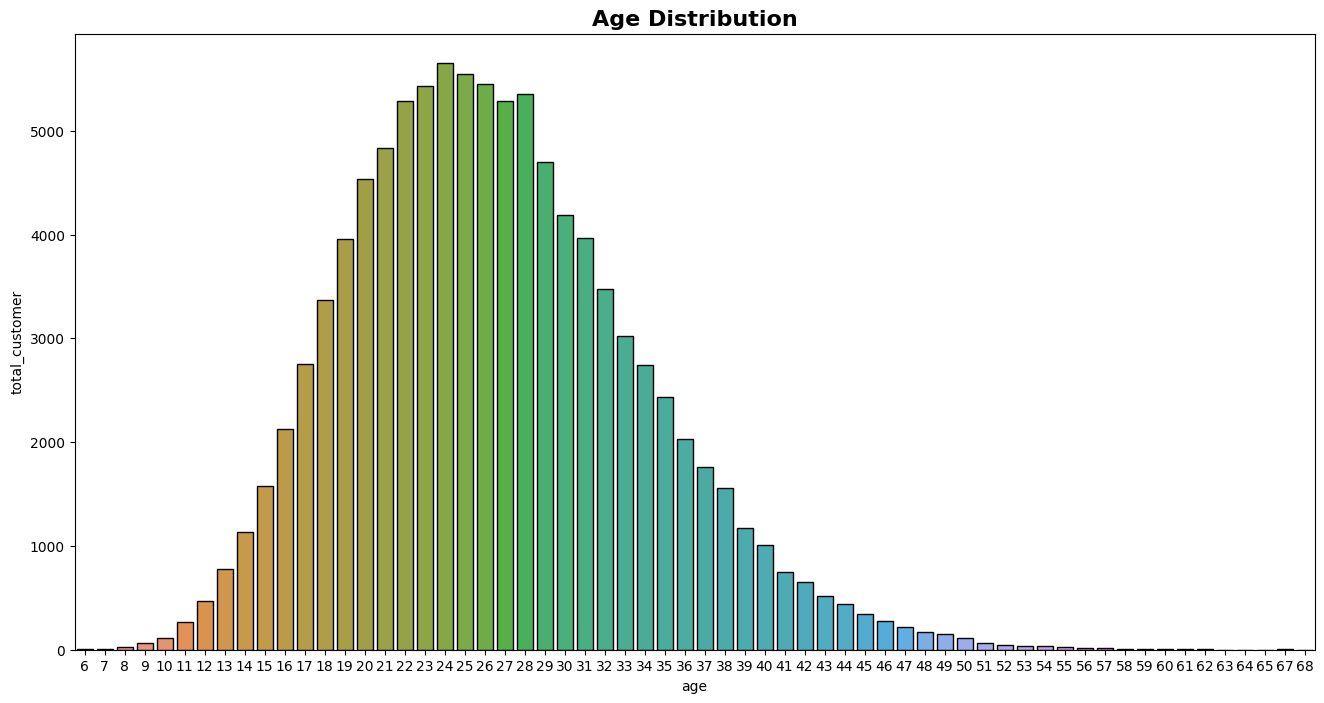

In [40]:
# visualisasi age distribution customer
customer_age = df_customer['age'].value_counts().reset_index().rename(columns = {'index' : 'age', 'age' : 'total_customer'})

plt.figure(figsize = (16, 8))
sns.barplot(data = customer_age, x = 'age', y = 'total_customer', edgecolor = 'black')
plt.title('Age Distribution', fontweight = 'bold', fontdict = {'fontsize' : 16})

Rentang umur pelanggan dari umur 6 sampai 68 tahun. Pelanggan terbanyak berada di umur 24 tahun

In [41]:
print('Total customers aged 24:')
print(df_customer[df_customer['age'] == 24]['customer_id'].count())

percentage_24 = df_customer[df_customer['age'] == 24]['customer_id'].count() / df_customer.shape[0]
print('Percentage:')
print(f'{round(100 * percentage_24, 2)}%')

Total customers aged 24:
5653
Percentage:
5.65%


<Axes: title={'center': 'Customer Age Range'}, ylabel='age_range'>

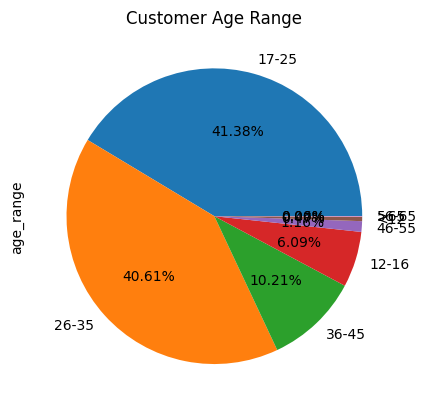

In [42]:
# visualisasi age range customer
df_customer['age_range'].value_counts().plot(kind = 'pie', title = 'Customer Age Range', autopct = '%1.2f%%')

Rentang umur pelanggan terbanyak fashion campus yaitu kelompok usia pekerja awal dengan rentang umur 25 - 34 tahun sebanyak 43.73%. Dan terbanyak kedua yaitu kelompok usia muda dengan rentang umur 15-24 tahun sebanyak 39.54%.

Hal ini cukup relate dengan target customer fashion campus yaitu kalangan anak muda.

In [43]:
# mengetahui jumlah customer berdasarkan gender
count_gender = df_customer['gender'].value_counts()
count_gender

F    64230
M    35770
Name: gender, dtype: int64

<Axes: title={'center': 'Customer Gender'}, ylabel='gender'>

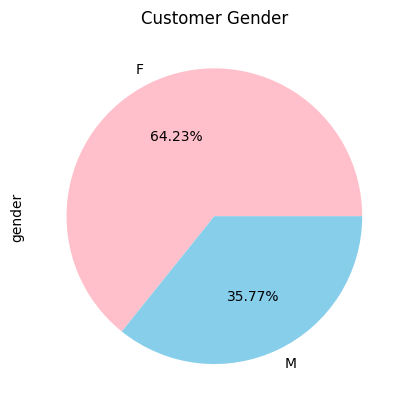

In [44]:
#visualisasi gender customer
df_customer['gender'].value_counts().plot(kind = 'pie', title = 'Customer Gender', autopct = '%1.2f%%', colors=['pink','skyblue'])

Berdasarkan grafik diatas dapat terlihat bahwa customer wanita lebih mendominasi (lebih banyak) dibandingkan dengan customer pria

In [45]:
# menghitung customer berdasarkan lokasi rumah
df_customer['home_location'].value_counts()

Jakarta Raya           18715
Jawa Barat             11486
Jawa Tengah            10960
Jawa Timur              9953
Yogyakarta              7849
Kalimantan Barat        5603
Lampung                 5426
Kalimantan Selatan      4229
Kalimantan Tengah       4091
Kalimantan Timur        2729
Maluku                  2490
Kepulauan Riau          1902
Bali                    1451
Sumatera Barat          1346
Nusa Tenggara Barat     1324
Sulawesi Utara          1279
Sulawesi Barat          1068
Sumatera Utara          1004
Sumatera Selatan         841
Papua                    753
Sulawesi Selatan         726
Papua Barat              660
Bengkulu                 654
Nusa Tenggara Timur      587
Sulawesi Tengah          505
Jambi                    385
Banten                   377
Maluku Utara             368
Gorontalo                348
Aceh                     263
Bangka Belitung          250
Sulawesi Tenggara        246
Riau                     132
Name: home_location, dtype: int64

<Axes: title={'center': 'Most Home Location Distribution'}>

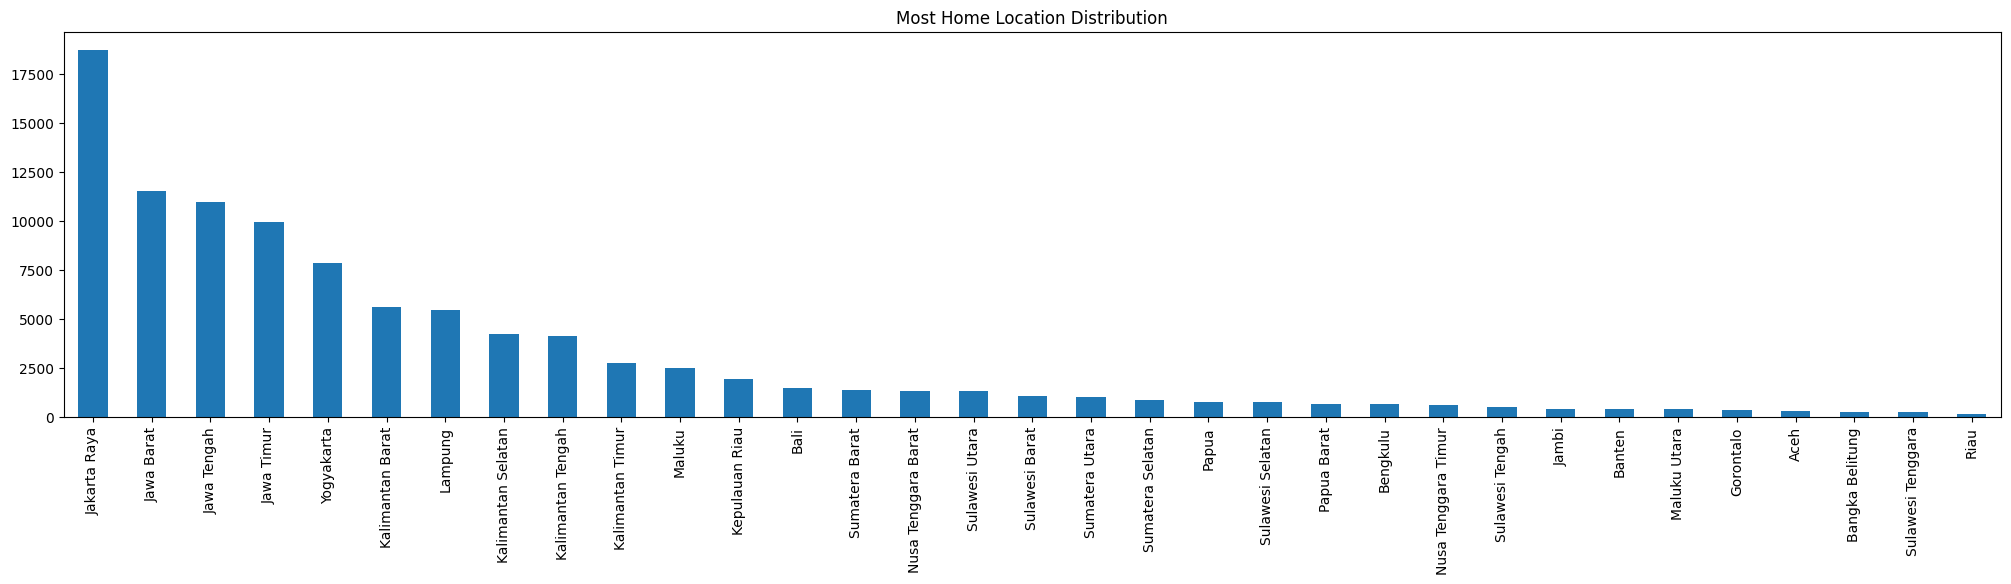

In [46]:
# visualisasi location customer
df_customer['home_location'].value_counts().plot(kind = 'bar', figsize = (25,5), title = 'Most Home Location Distribution')

In [47]:
df_customer['home_location'].value_counts()

Jakarta Raya           18715
Jawa Barat             11486
Jawa Tengah            10960
Jawa Timur              9953
Yogyakarta              7849
Kalimantan Barat        5603
Lampung                 5426
Kalimantan Selatan      4229
Kalimantan Tengah       4091
Kalimantan Timur        2729
Maluku                  2490
Kepulauan Riau          1902
Bali                    1451
Sumatera Barat          1346
Nusa Tenggara Barat     1324
Sulawesi Utara          1279
Sulawesi Barat          1068
Sumatera Utara          1004
Sumatera Selatan         841
Papua                    753
Sulawesi Selatan         726
Papua Barat              660
Bengkulu                 654
Nusa Tenggara Timur      587
Sulawesi Tengah          505
Jambi                    385
Banten                   377
Maluku Utara             368
Gorontalo                348
Aceh                     263
Bangka Belitung          250
Sulawesi Tenggara        246
Riau                     132
Name: home_location, dtype: int64

Text(0.5, 1.0, 'Distribusi Customer Berdasarkan  Kota')

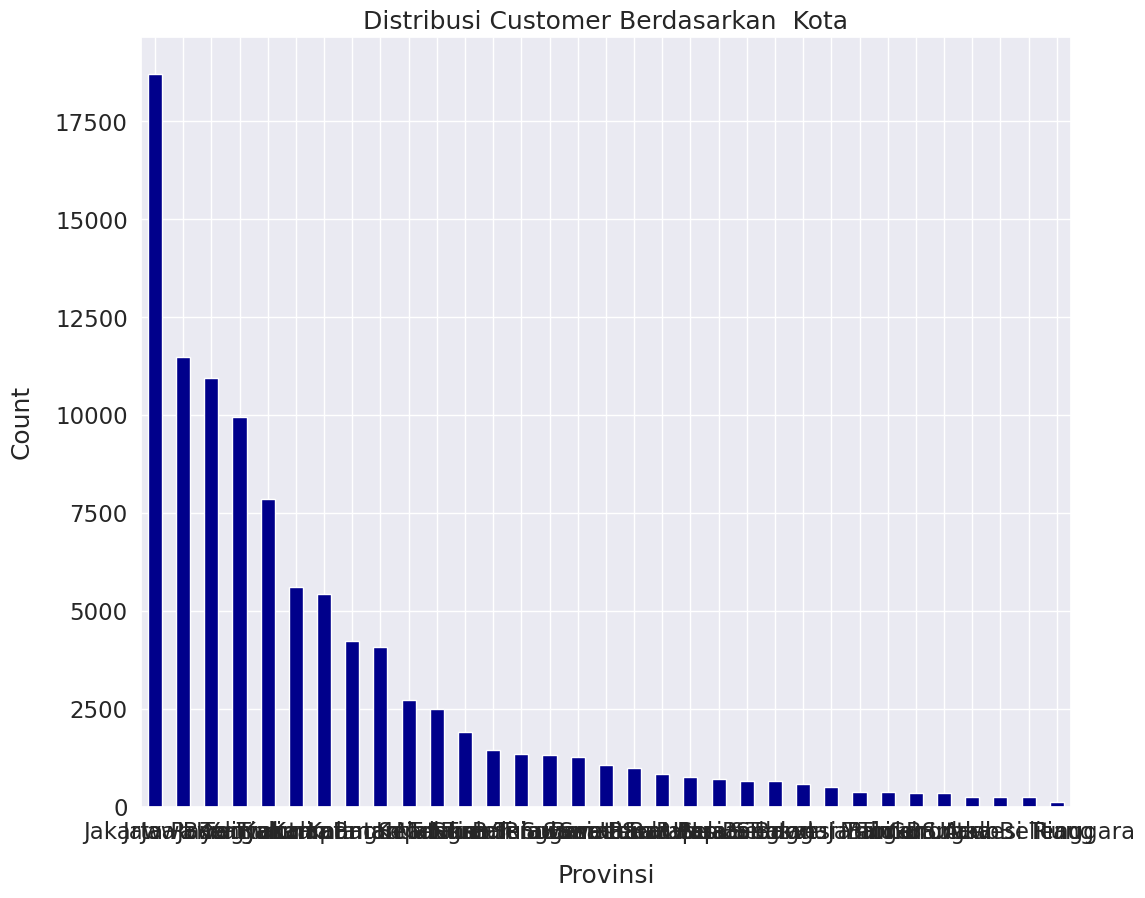

In [48]:
# melihat data distribusi customer berdasarkan kota
sns.set(font_scale=1.5)
df_customer['home_location'].value_counts().plot(kind='bar',figsize=(12,10),rot=0, color='darkblue')
plt.xlabel('Provinsi',labelpad=15)
plt.ylabel('Count',labelpad=15)
plt.title('Distribusi Customer Berdasarkan  Kota')

Lokasi dengan pelanggan terbanyak berada di provinsi DKI Jakarta. Jika diteliti lebih lanjut pelanggan terbanyak berada di pulau Jawa.

Sedangkan lokasi dengan pelanggan paling sedikit berada di provinsi Riau.

**Device**

In [49]:
# mengetahui jumlah customer berdasarkan device type
count_device = df_customer['device_type'].value_counts()
count_device

Android    76637
iOS        23363
Name: device_type, dtype: int64

<Axes: title={'center': 'Customer Device Type'}, ylabel='device_type'>

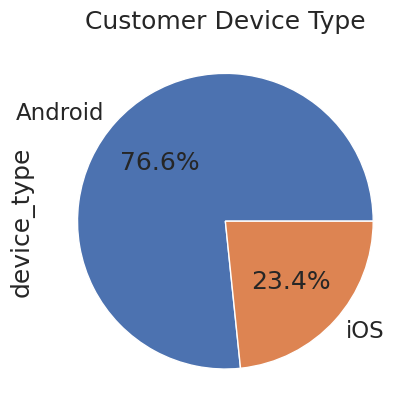

In [50]:
# memvisualisasikan jumlah customer berdasarkan device type
df_customer['device_type'].value_counts().plot(kind = 'pie', title = 'Customer Device Type', autopct = '%1.1f%%')
# Plot the pie chart
# plt.figure(figsize=(5, 5))
# plt.title('Customer Device Type')
# plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
# plt.show()

Berdasarkan grafik diatas dapat terlihat bahwa customer lebih banyak menggunakan tipe device android dibandingkan dengan ios.

In [51]:
# menghitung customer berdasarkan negara
df_customer['home_country'].value_counts()

Indonesia    100000
Name: home_country, dtype: int64

**New Customer Every Year**

Text(0.5, 1.0, 'New Customer Every Year (Jan-Des)')

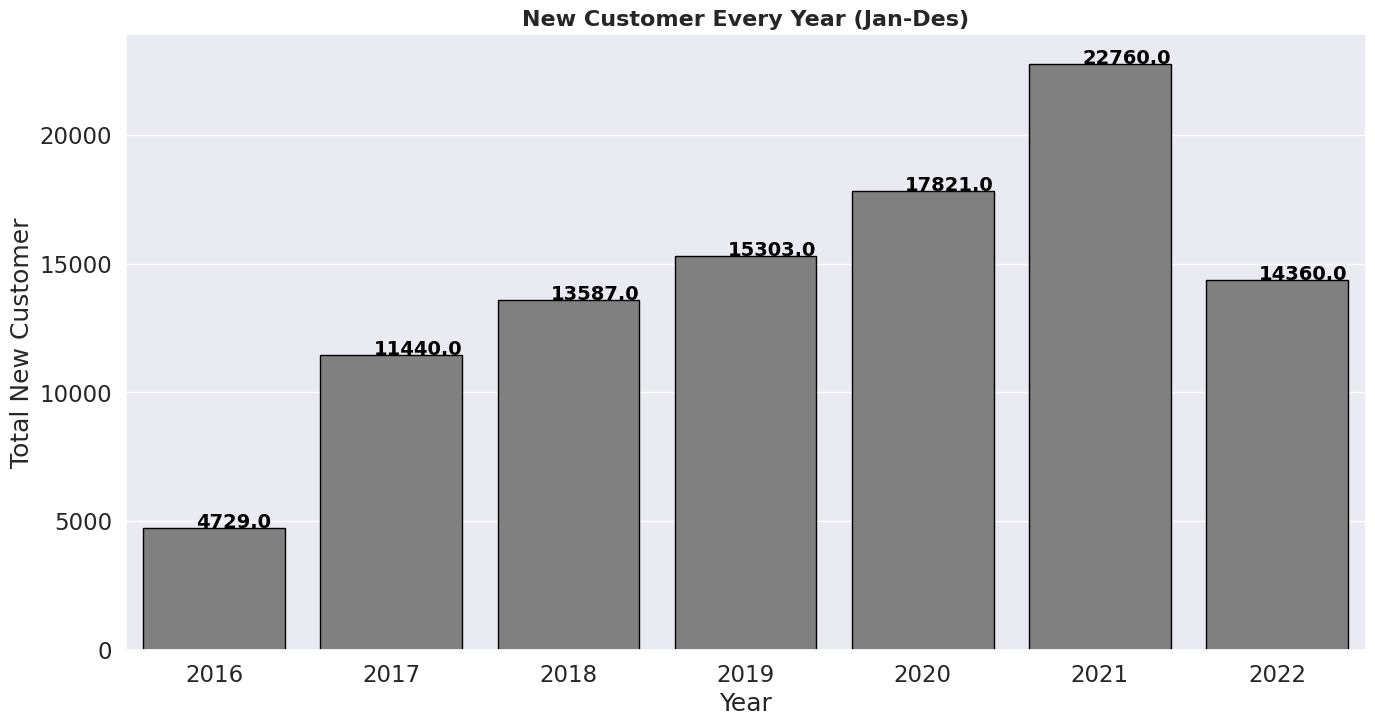

In [52]:
month17=[1,2,3,4,5,6,7,8,9,10,11,12]
new_customer_year = df_customer[pd.DatetimeIndex(df_customer['first_join_date']).month.isin(month17)]

plt.figure(figsize = (16, 8))
ax = sns.countplot(data = new_customer_year, x = 'first_join_year', edgecolor = 'black', color='grey')
for i in ax.patches:
    plt.text(i.get_x()+0.3, i.get_height()+0.5, str(round((i.get_height()), 1)), fontsize = 14, fontweight ='bold', color ='black')
plt.xlabel('Year')
plt.ylabel('Total New Customer')
plt.title('New Customer Every Year (Jan-Des)', fontweight = 'bold', fontdict = {'fontsize' : 16})

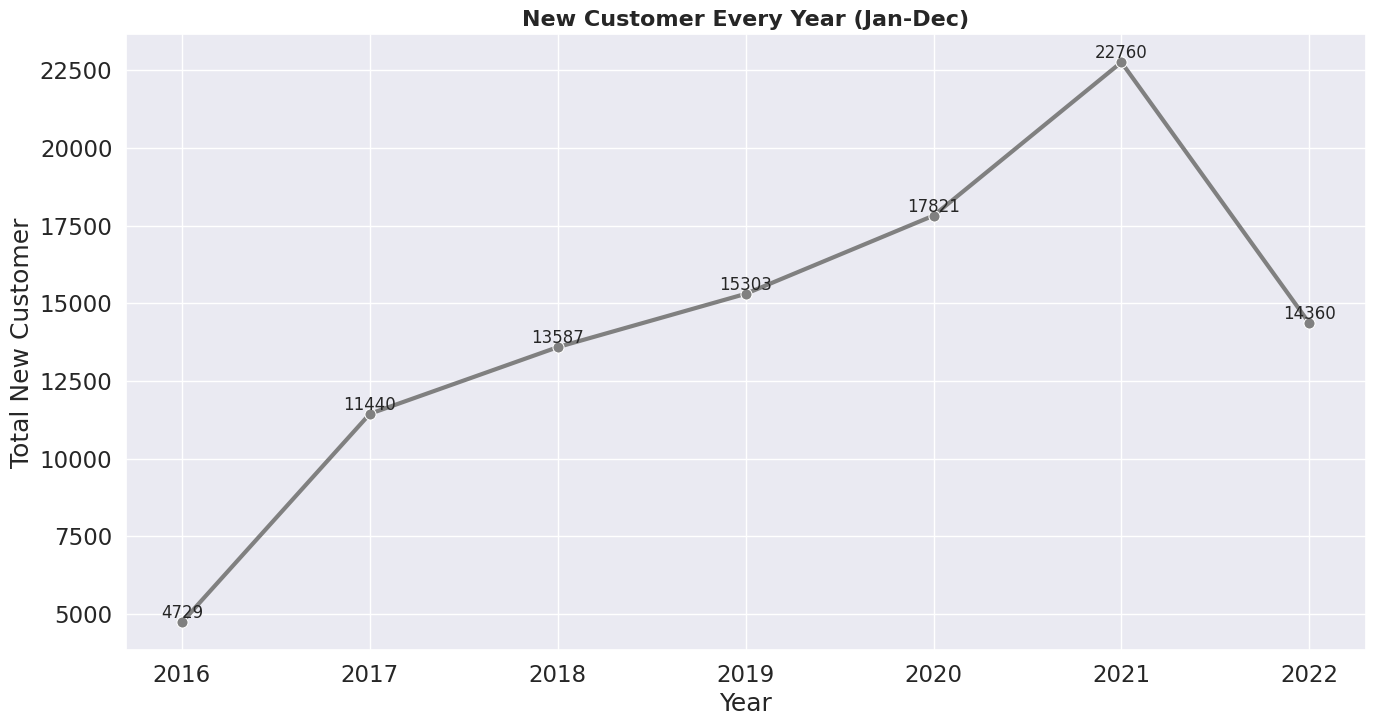

In [53]:
month17 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
new_customer_year = df_customer[pd.DatetimeIndex(df_customer['first_join_date']).month.isin(month17)]

plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=new_customer_year.groupby('first_join_year').size(), marker='o', color='grey', markersize=8, linewidth=3)  # Menggunakan sns.lineplot
plt.xlabel('Year')
plt.ylabel('Total New Customer')
plt.title('New Customer Every Year (Jan-Dec)', fontweight='bold', fontdict={'fontsize': 16})

# Menampilkan angka pada setiap titik data (marker)
for x, y in zip(new_customer_year.groupby('first_join_year').size().index, new_customer_year.groupby('first_join_year').size().values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12)

plt.show()


Jumlah pelanggan baru dari tahun ke tahun mengalami kenaikan, terutama pada saat pandemi covid 19

In [54]:
#mengubah tipe data  object ke datetime
# date = ['birthdate', 'first_join_date']
# for i in date:
#   df_customer[i] = pd.to_datetime(df_customer[i])

### Eksplorasi Data Produk

In [55]:
# melihat unique value pada produk
df_product.nunique()

id                    44446
productGender             5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31136
dtype: int64

In [56]:
# mengecek missing value
df_product.isnull().sum()

id                      0
productGender           0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [57]:
df_product[['id','baseColour','season','usage','year']].isnull().sum()

id              0
baseColour     15
season         21
usage         317
year            1
dtype: int64

In [58]:
# merename kolom id menjadi product_id
# df_product.rename(columns=({'id':'product_id'}), inplace=True)
df_product.head(1000)

,id,productGender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
995,48911,Women,Accessories,Jewellery,Pendant,Silver,Summer,2013.0,Casual,Lucera Women Silver Pendant with Chain
996,29926,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Police Men Black Dial Watch PL12778MSU-61
997,42417,Unisex,Accessories,Accessories,Messenger Bag,Purple,Summer,2012.0,Casual,American Tourister Unisex Purple Messenger Bag
998,3730,Men,Apparel,Topwear,Tshirts,Yellow,Summer,2011.0,Sports,CSK Mens Fangear Yellow Jersey


In [59]:
#Rename columns
df_product = df_product.rename(columns = {'gender' : 'productGender'})

df_product['id'] = df_product['id'].astype(int)

<Axes: title={'center': 'productGender'}, ylabel='productGender'>

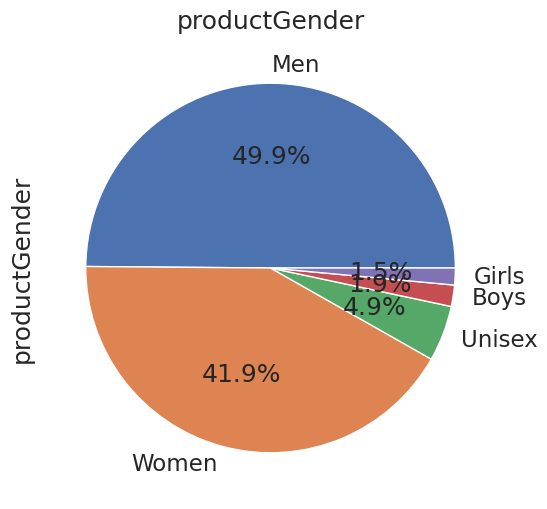

In [60]:
df_product['productGender'].value_counts().plot(kind = 'pie',figsize=(6, 6), title = 'productGender', autopct = '%1.1f%%')

In [61]:
result = df_product.groupby(['masterCategory', 'subCategory','articleType']).size().reset_index(name='count')
result.head(20)


,masterCategory,subCategory,articleType,count
0,Accessories,Accessories,Accessory Gift Set,111
1,Accessories,Accessories,Hair Accessory,1
2,Accessories,Accessories,Key chain,2
3,Accessories,Accessories,Messenger Bag,10
4,Accessories,Accessories,Travel Accessory,15
5,Accessories,Accessories,Water Bottle,4
6,Accessories,Bags,Backpacks,722
7,Accessories,Bags,Clutches,289
8,Accessories,Bags,Duffel Bag,88
9,Accessories,Bags,Handbags,1757


<Axes: title={'center': 'Master Category'}>

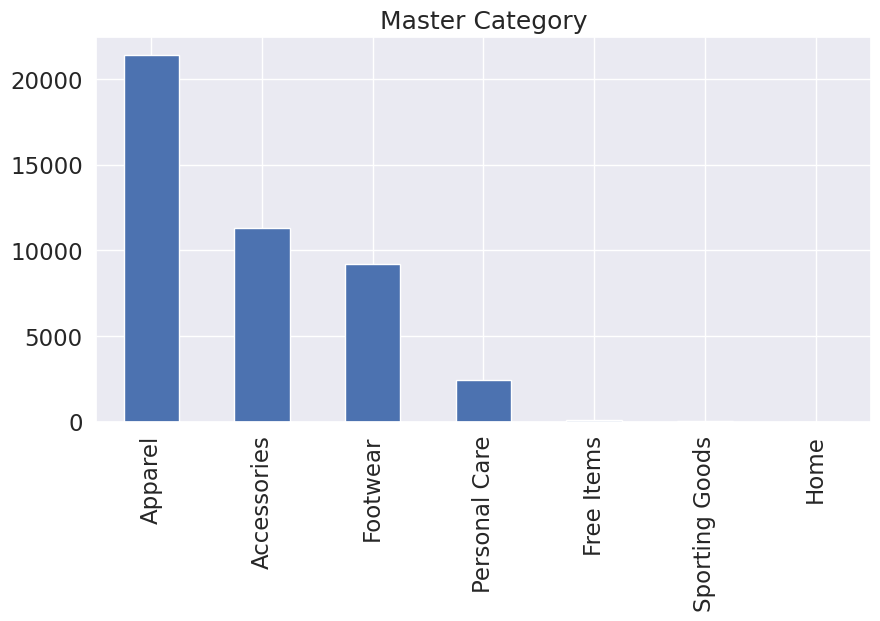

In [62]:
df_product['masterCategory'].value_counts().plot(kind='bar', figsize=(10,5), title = "Master Category")

In [63]:
# melihat data unik di kolom subCategory
df_product['subCategory'].value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

<Axes: title={'center': 'Sub Category'}>

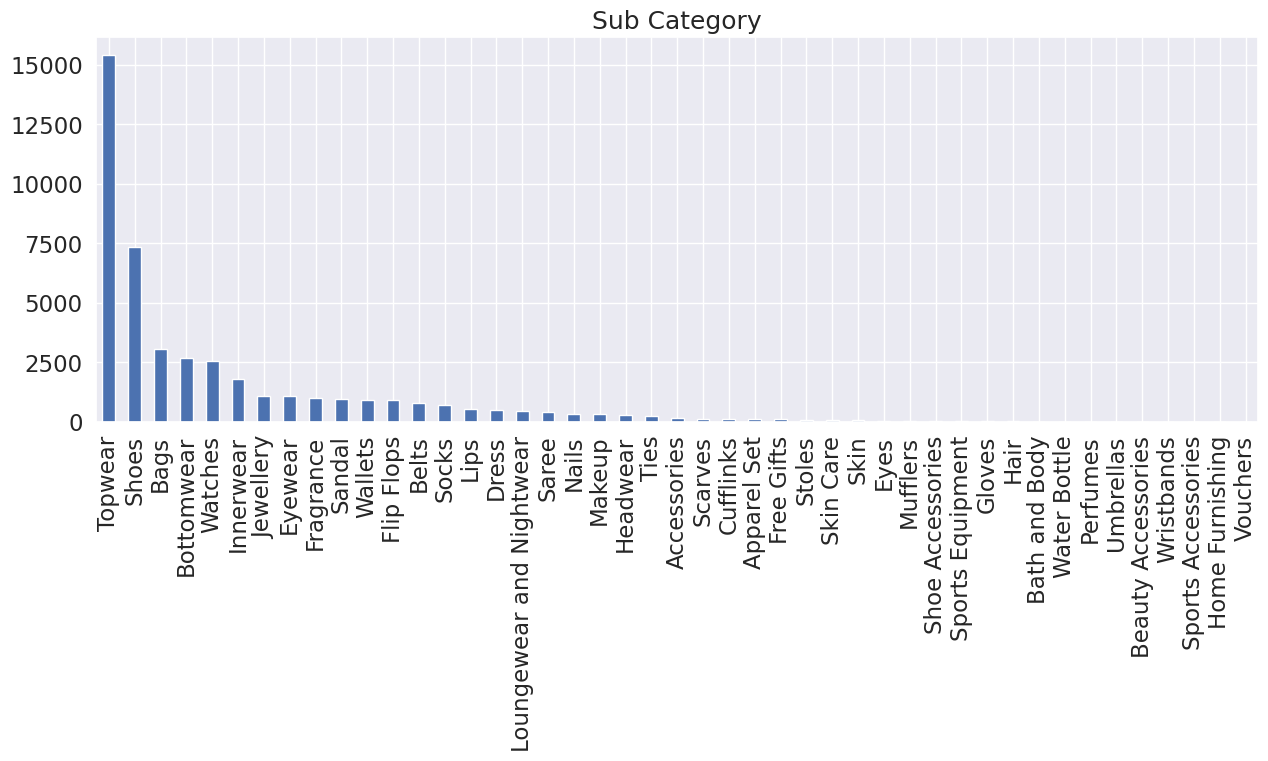

In [64]:
df_product['subCategory'].value_counts().plot(kind='bar', figsize=(15,5), title = "Sub Category")

<Axes: title={'center': 'usage'}>

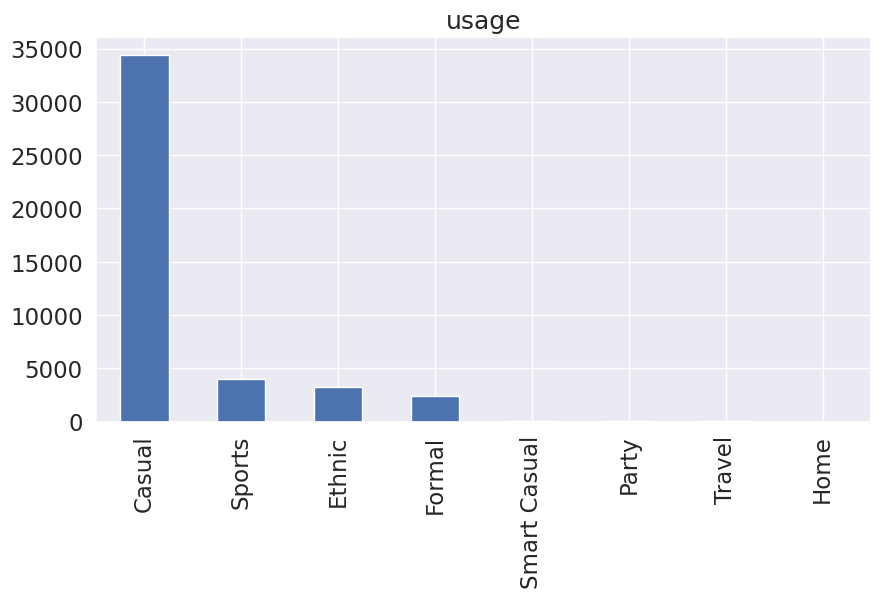

In [65]:
# melihat data unik di kolom usage
df_product['usage'].value_counts().plot(kind = 'bar',figsize=(10,5), title = 'usage')

<Axes: title={'center': 'Season'}, ylabel='season'>

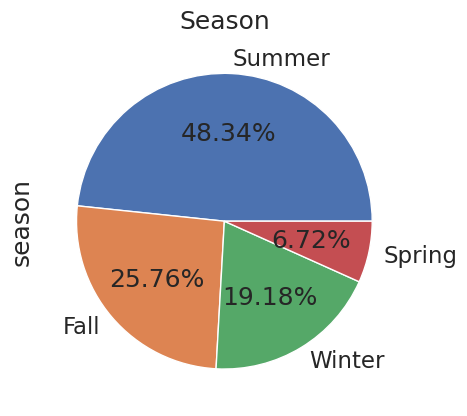

In [66]:
# melihat data unik di kolom season
df_product['season'].value_counts().plot(kind='pie', title = 'Season', autopct = '%1.2f%%')

<Axes: title={'center': 'Article Type'}>

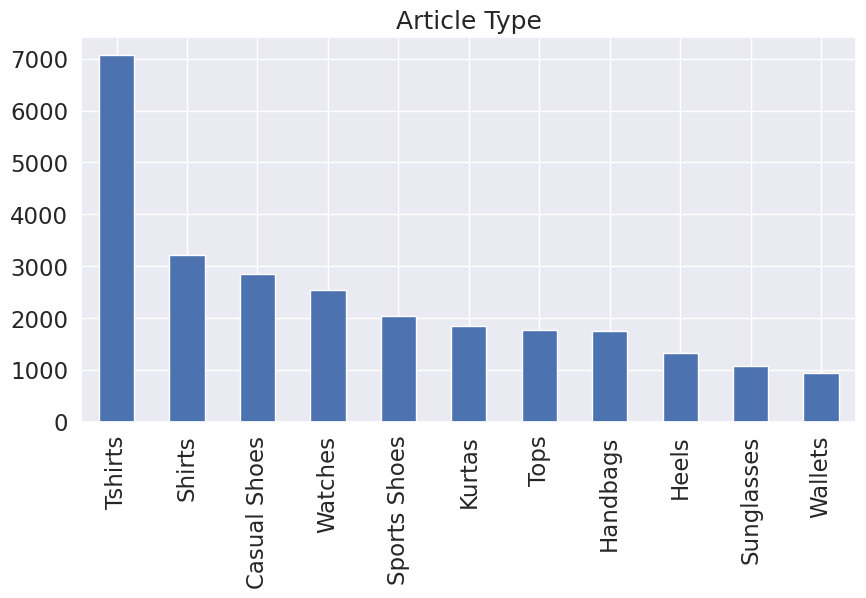

In [67]:
df_product['articleType'].value_counts()[:11].plot(kind='bar', figsize=(10,5), title = "Article Type")

<Axes: title={'center': 'Products Percentage by Year'}>

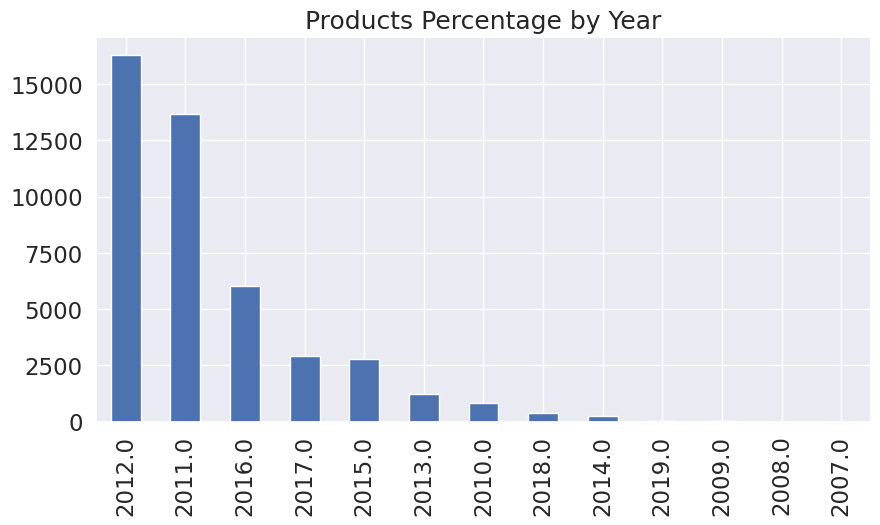

In [68]:
# melihat data unik di kolom year
df_product['year'].value_counts().plot(kind='bar', figsize=(10,5), title='Products Percentage by Year')

<Axes: title={'center': 'Base Colour'}>

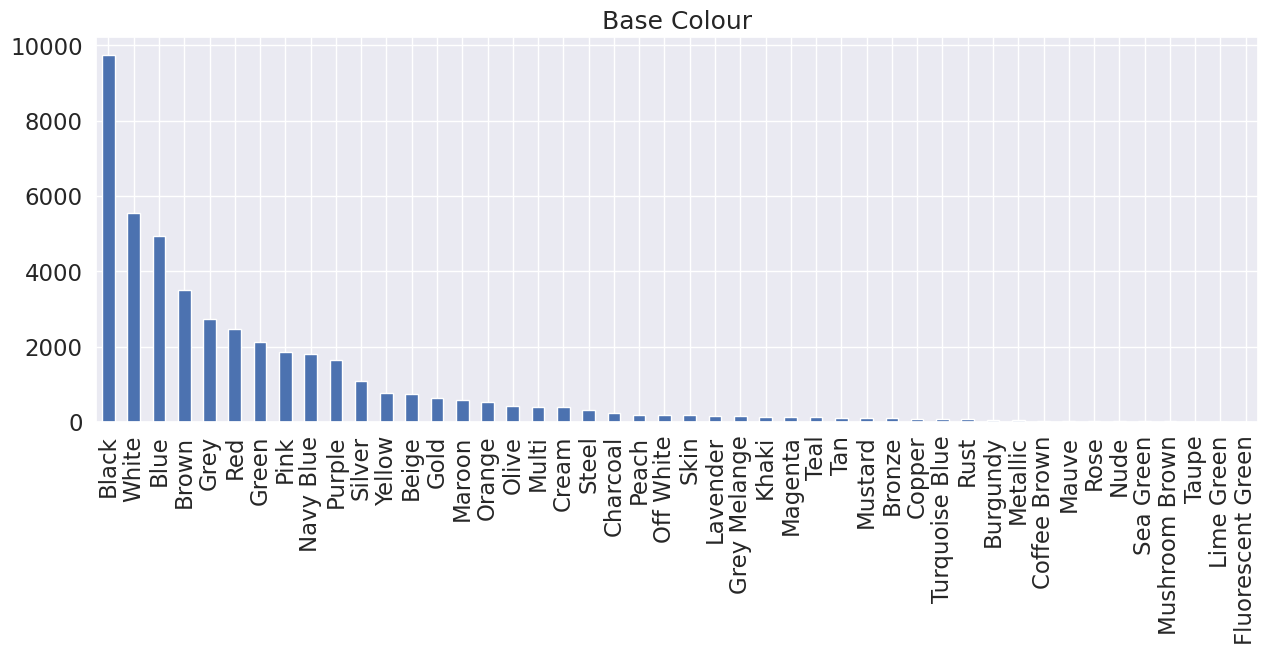

In [69]:
df_product['baseColour'].value_counts().plot(kind='bar', figsize=(15,5), title = "Base Colour")

### Eksplorasi Data Transaksi

In [70]:
# mengecek missing value
df_transactions.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                586895
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

Dapat dilihat dari pengecekan missing value, terdapat sebanyak 436024 nilai null pada promo_code. Untuk hal ini kita asumsikan bahwa customer tidak menggunakan kode promo dalam transaksinya, sehingga muncul nilai null pada kolom promo_code. Oleh karena itu, kita akan mengatasi missing value pada kolom promo_code dengan menggantinya dengan simbol '-'.

In [71]:
# handling missing value at column promo_code
df_transactions['promo_code'] = df_transactions['promo_code'].fillna('tanpa promo')

In [72]:
# mengecek missing value setelah dilakukan handling missing value
df_transactions.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
dtype: int64

In [73]:
# menghitung unique value pada data transaksi
df_transactions.nunique()

created_at                623719
customer_id                46062
booking_id                623719
session_id                623719
product_metadata          918088
payment_method                 5
payment_status                 2
promo_amount               14329
promo_code                     9
shipment_fee                   6
shipment_date_limit       623719
shipment_location_lat     341615
shipment_location_long    341615
total_amount              385873
product_id                 44446
quantity                      42
item_price                344867
dtype: int64

In [74]:
# melihat statistik pada data transaksi
df_transactions[['customer_id','total_amount', 'quantity', 'promo_amount', 'shipment_fee']].describe()

,customer_id,total_amount,quantity,promo_amount,shipment_fee
count,918114.000000,9.181140e+05,918114.000000,918114.000000,918114.000000
mean,49845.484262,1.184215e+06,1.475094,1924.770308,9204.695713
std,29103.028724,1.738389e+06,1.591763,3015.775696,9387.890600
min,3.000000,1.089800e+04,1.000000,0.000000,0.000000
25%,24380.000000,2.469702e+05,1.000000,0.000000,0.000000
50%,49667.000000,4.563815e+05,1.000000,0.000000,10000.000000
75%,75188.000000,1.364554e+06,1.000000,3765.000000,10000.000000
max,99998.000000,2.350449e+07,43.000000,24519.000000,50000.000000


In [75]:
# add columns

# month year order
df_transactions['created_at'] = df_transactions['created_at'].astype('datetime64')
df_transactions['order_year'] = df_transactions['created_at'].dt.year
# df_transactions['order_month_year'] = df_transactions['created_at'].dt.month_name()
# by year
df_transactions['order_month'] = pd.to_datetime(df_transactions['created_at']).dt.strftime("%Y-%m")

# shipment time
df_transactions['shipment_time'] = df_transactions['shipment_date_limit'].astype('datetime64')
# df_transactions['shipment_time'] = df_transactions['shipment_time'].astype('timedelta64[D]')

In [76]:
transactions_no_duplicate = df_transactions.drop_duplicates('booking_id')

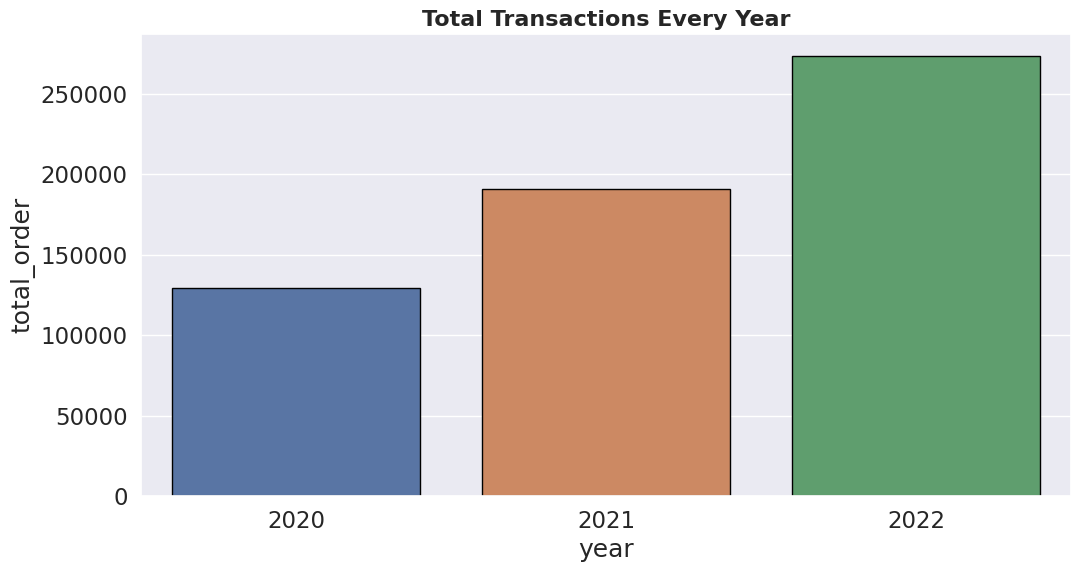

In [77]:
# mencari total transaksi setiap tahun
df_transactions['year'] = pd.to_datetime(df_transactions['created_at']).dt.year
df_transactions['month'] = pd.to_datetime(df_transactions['created_at']).dt.month

month17 = [1, 2, 3, 4, 5, 6, 7]

transactions_month17 = df_transactions[df_transactions['month'].isin(month17)]
transactions_year = transactions_month17[transactions_month17['payment_status'] == 'Success'].groupby('year')['created_at'].count().reset_index()
transactions_year = transactions_year.rename(columns = {'created_at' : 'total_order'})

plt.figure(figsize = (12, 6))
sns.barplot(data = transactions_year, x = 'year', y = 'total_order', edgecolor = 'black')
plt.title('Total Transactions Every Year', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

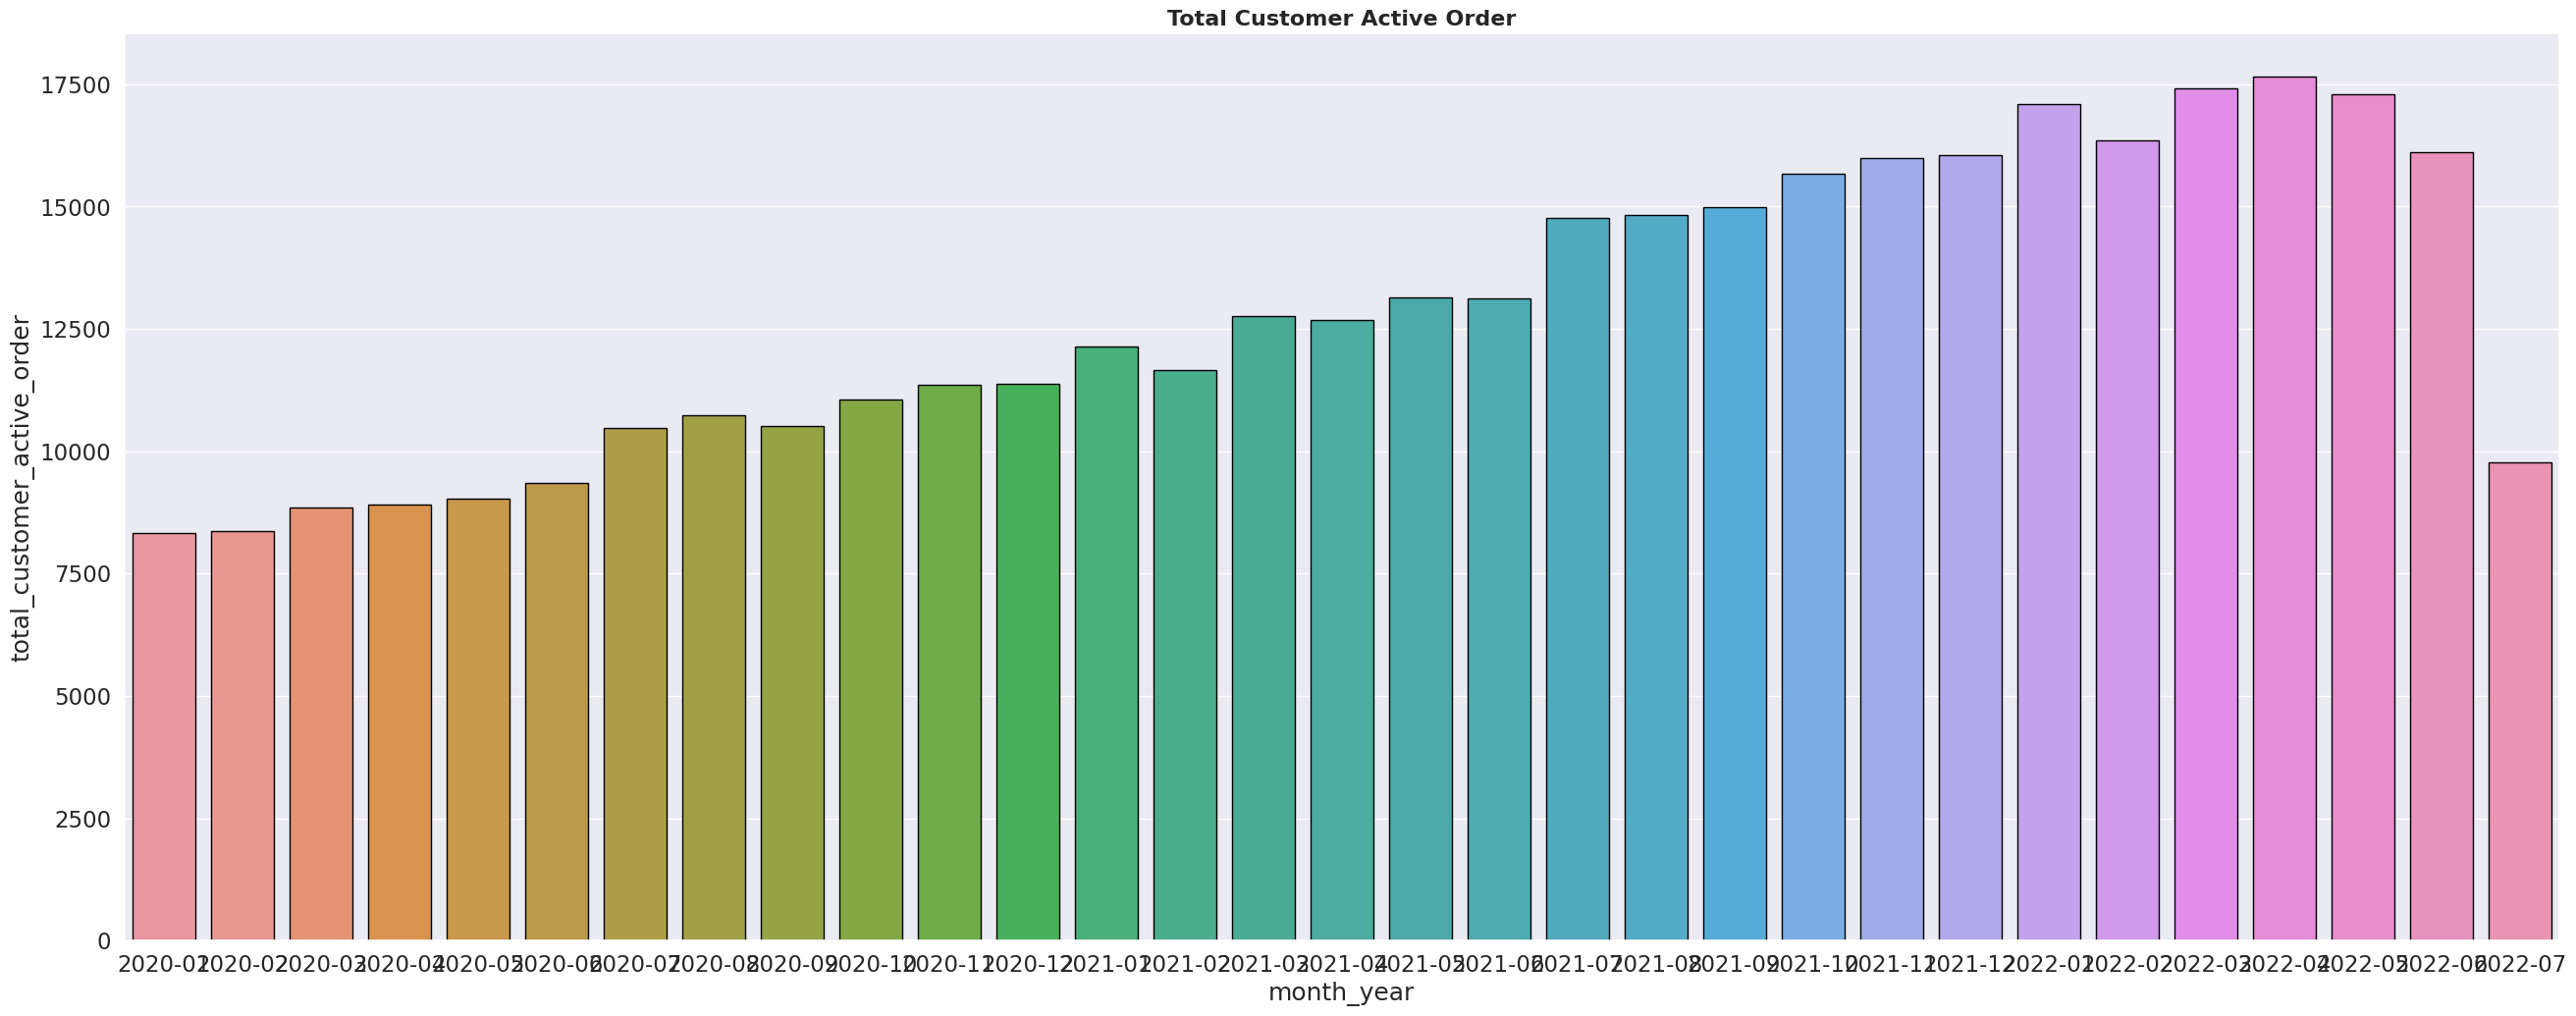

In [78]:
# mencari total customer yang aktif order
df_transactions['month_year'] = pd.to_datetime(df_transactions['created_at']).dt.to_period('M')
transactions_20_22 = df_transactions[df_transactions['created_at'] >= '2020-01-01']
transactions_20_22 = transactions_20_22.drop_duplicates(['customer_id', 'month_year'])

transactions_customer = transactions_20_22[transactions_20_22['payment_status'] == 'Success'].groupby('month_year')['created_at'].count().reset_index()
transactions_customer = transactions_customer.rename(columns = {'created_at' : 'total_customer_active_order'})

plt.figure(figsize = (32, 12))
sns.barplot(data = transactions_customer, x = 'month_year', y = 'total_customer_active_order', edgecolor = 'black')
sns.set_context("notebook", rc={"font.size":16})
plt.title('Total Customer Active Order', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

Total transaksi (bulan 1 - 7) terus meningkat pesat, terutama ketika pandemi covid-19

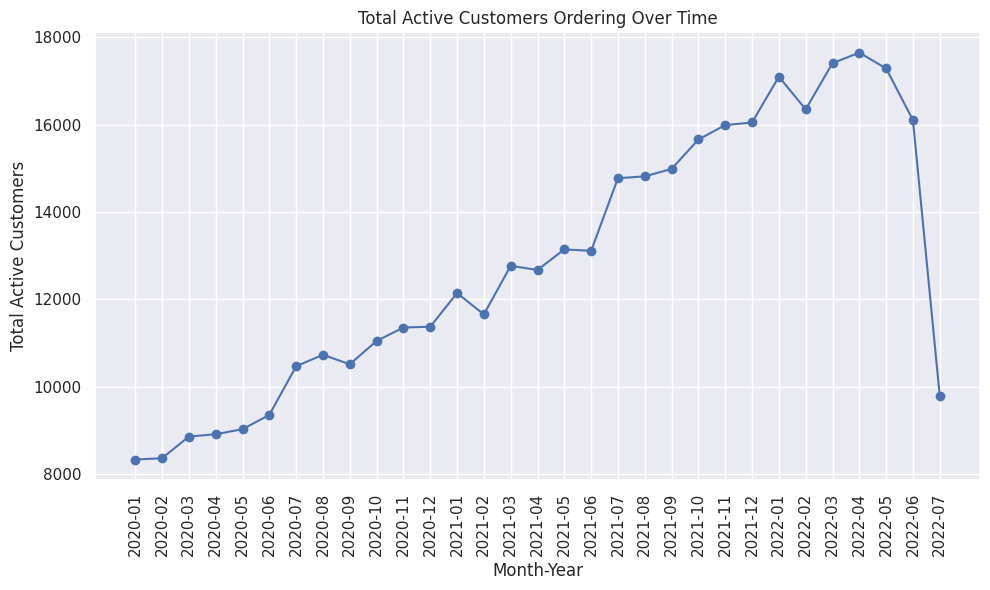

In [79]:
# Filter transactions for 2020-2022 and remove duplicates
transactions_20_22 = df_transactions[df_transactions['created_at'] >= '2020-01-01']
transactions_20_22 = transactions_20_22.drop_duplicates(['customer_id', 'order_month'])

# Filter successful transactions and group by 'order_month'
transactions_customer = transactions_20_22[transactions_20_22['payment_status'] == 'Success']
transactions_customer = transactions_customer.groupby('order_month')['created_at'].count().reset_index()
transactions_customer = transactions_customer.rename(columns={'created_at': 'total_customer_active_order'})

# Line chart using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(transactions_customer['order_month'], transactions_customer['total_customer_active_order'], marker='o')
plt.title('Total Active Customers Ordering Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Active Customers')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# # Menampilkan angka pada setiap mark
# for i, txt in enumerate(transactions_customer['total_customer_active_order']):
#     plt.annotate(txt, (transactions_customer['order_month'][i], transactions_customer['total_customer_active_order'][i]))

plt.show()


In [80]:
df_transactions['month_year']

0         2020-02
1         2020-02
2         2020-02
3         2020-02
4         2020-04
           ...   
918109    2022-07
918110    2020-11
918111    2021-09
918112    2021-12
918113    2021-12
Name: month_year, Length: 918114, dtype: period[M]

In [81]:
transactions_customer

,order_month,total_customer_active_order
0,2020-01,8333
1,2020-02,8363
2,2020-03,8858
3,2020-04,8913
4,2020-05,9028
5,2020-06,9354
6,2020-07,10470
7,2020-08,10732
8,2020-09,10515
9,2020-10,11049


Pada bulan Juli 2022 jumlah pelanggan yang aktif melakukan order mengalami penurunan yang cukup banyak dibandingkan bulan - bulan sebelumnya.

In [82]:
df_transactions['created_at'].max()

Timestamp('2022-07-31 23:59:45.821469')

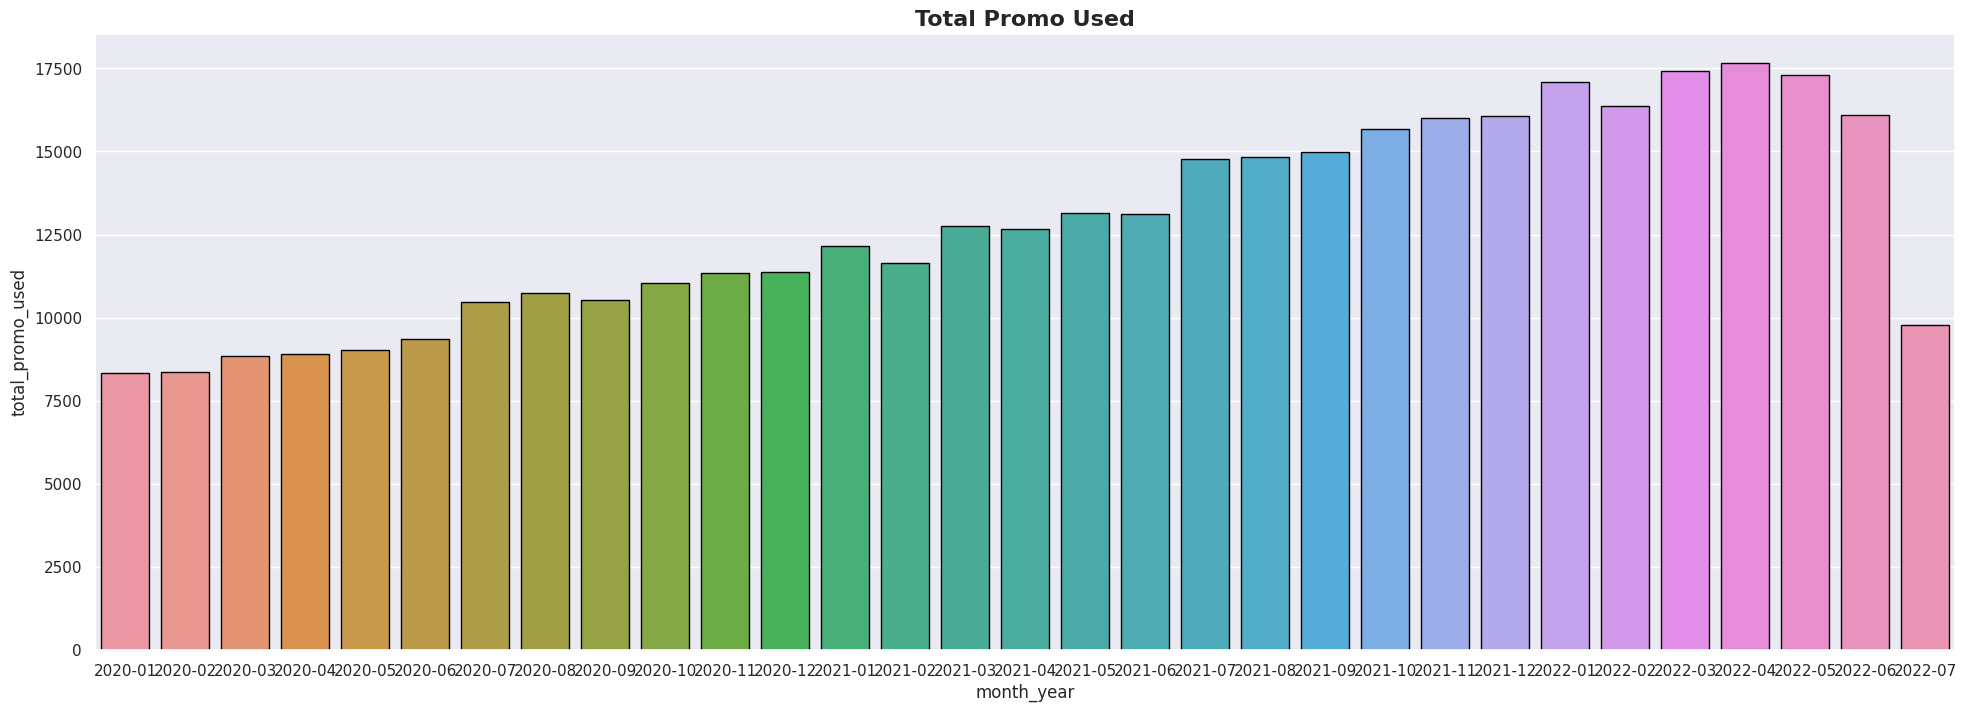

In [83]:
# mencari total promo yang digunakan customer
transactions_20_22_promo = transactions_20_22[transactions_20_22['promo_code'].isnull() == False]

transactions_promo_year = transactions_20_22_promo[transactions_20_22_promo['payment_status'] == 'Success'].groupby('month_year')['created_at'].count().reset_index()
transactions_promo_year = transactions_promo_year.rename(columns = {'created_at' : 'total_promo_used'})

plt.figure(figsize = (24, 8))
sns.barplot(data = transactions_promo_year, x = 'month_year', y = 'total_promo_used', edgecolor = 'black')
plt.title('Total Promo Used', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

promo yang digunakan pada bulan juli 2022 juga mengalami penurunan hampir setengah dari bulan Juni 2022. Kemungkinan dikarenakan promo yang tersedia sedikit, maka banyak pelanggan yang tidak melakukan transaksi.

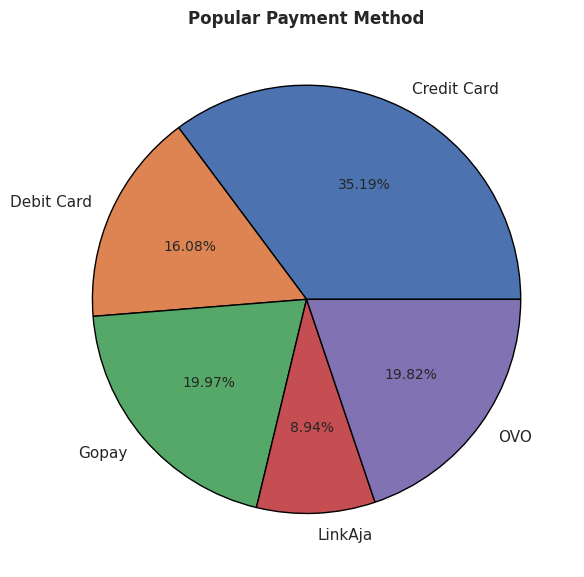

In [84]:
# mencari payment method yang paling sering digunakan oleh customer
payment_method = df_transactions[df_transactions['payment_status'] == 'Success'].groupby('payment_method')['created_at'].count().reset_index()
payment_method = payment_method.rename(columns = {'created_at' : 'total_order'})

plt.figure(figsize = (6, 6))
plt.pie(data = payment_method, x = 'total_order', labels = 'payment_method', autopct = '%1.2f%%', wedgeprops = {'edgecolor' : 'black'})
plt.title('Popular Payment Method', fontweight = 'bold', fontdict = {'fontsize' : 12})
plt.rcParams['font.size'] = 10
plt.tight_layout()

Dapat dilihat bahwa metode pembayaran yang banyak customer gunakan adalah credit card, gopay dan OVO

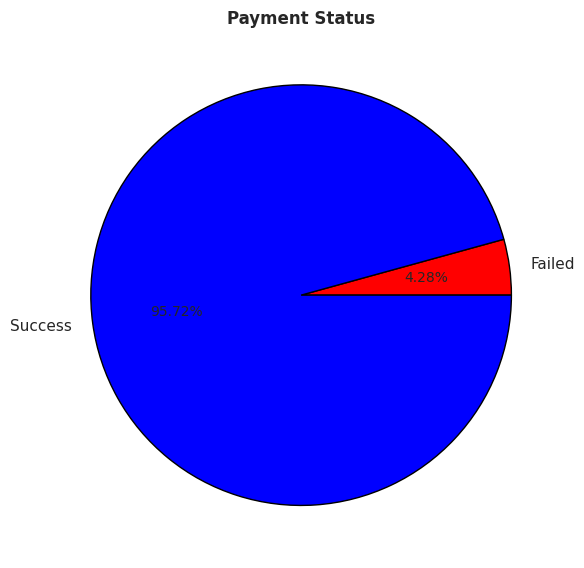

In [85]:
# mencari payment status yang dialami customer
payment_status = df_transactions.groupby('payment_status')['created_at'].count().reset_index()
payment_status = payment_status.rename(columns = {'created_at' : 'total_order'})

plt.figure(figsize = (6, 6))
plt.pie(data = payment_status, x = 'total_order', labels = 'payment_status', autopct = '%1.2f%%', wedgeprops = {'edgecolor' : 'black'}, colors = ['red', 'blue'])
plt.title('Payment Status', fontweight = 'bold', fontdict = {'fontsize' : 12})
plt.rcParams['font.size'] = 10
plt.tight_layout()

Dapat dilihat bahwa ketika transaksi pembayaran yang gagal sangat sedikit dibandingkan pembayaran yang berhasil

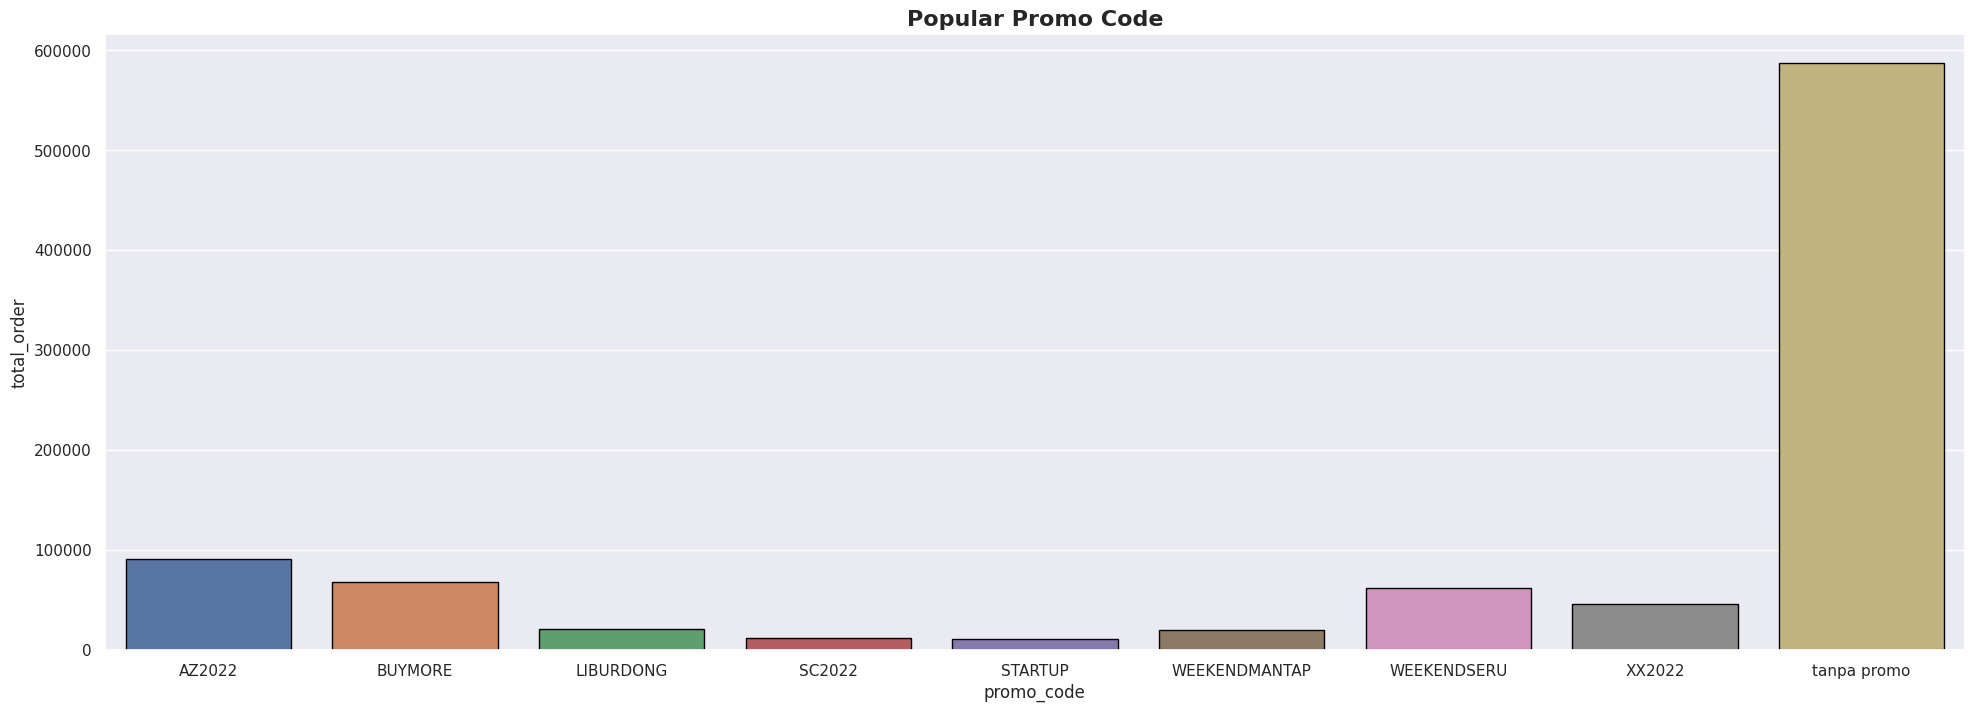

In [86]:
# mencari promo kode yang paling sering digunakan oleh pelanggan
promo_code = df_transactions.groupby('promo_code')['created_at'].count().reset_index()
promo_code = promo_code.rename(columns = {'created_at' : 'total_order'})

plt.figure(figsize = (24, 8))
sns.barplot(data = promo_code, x = 'promo_code', y = 'total_order', edgecolor = 'black')
plt.title('Popular Promo Code', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

In [87]:
promo_code.head()

,promo_code,total_order
0,AZ2022,90912
1,BUYMORE,68317
2,LIBURDONG,20989
3,SC2022,11564
4,STARTUP,11378


Kode promo yang paling banyak digunakan adalah AZ2022, BUYMORE, dan WEEKENDSERU.

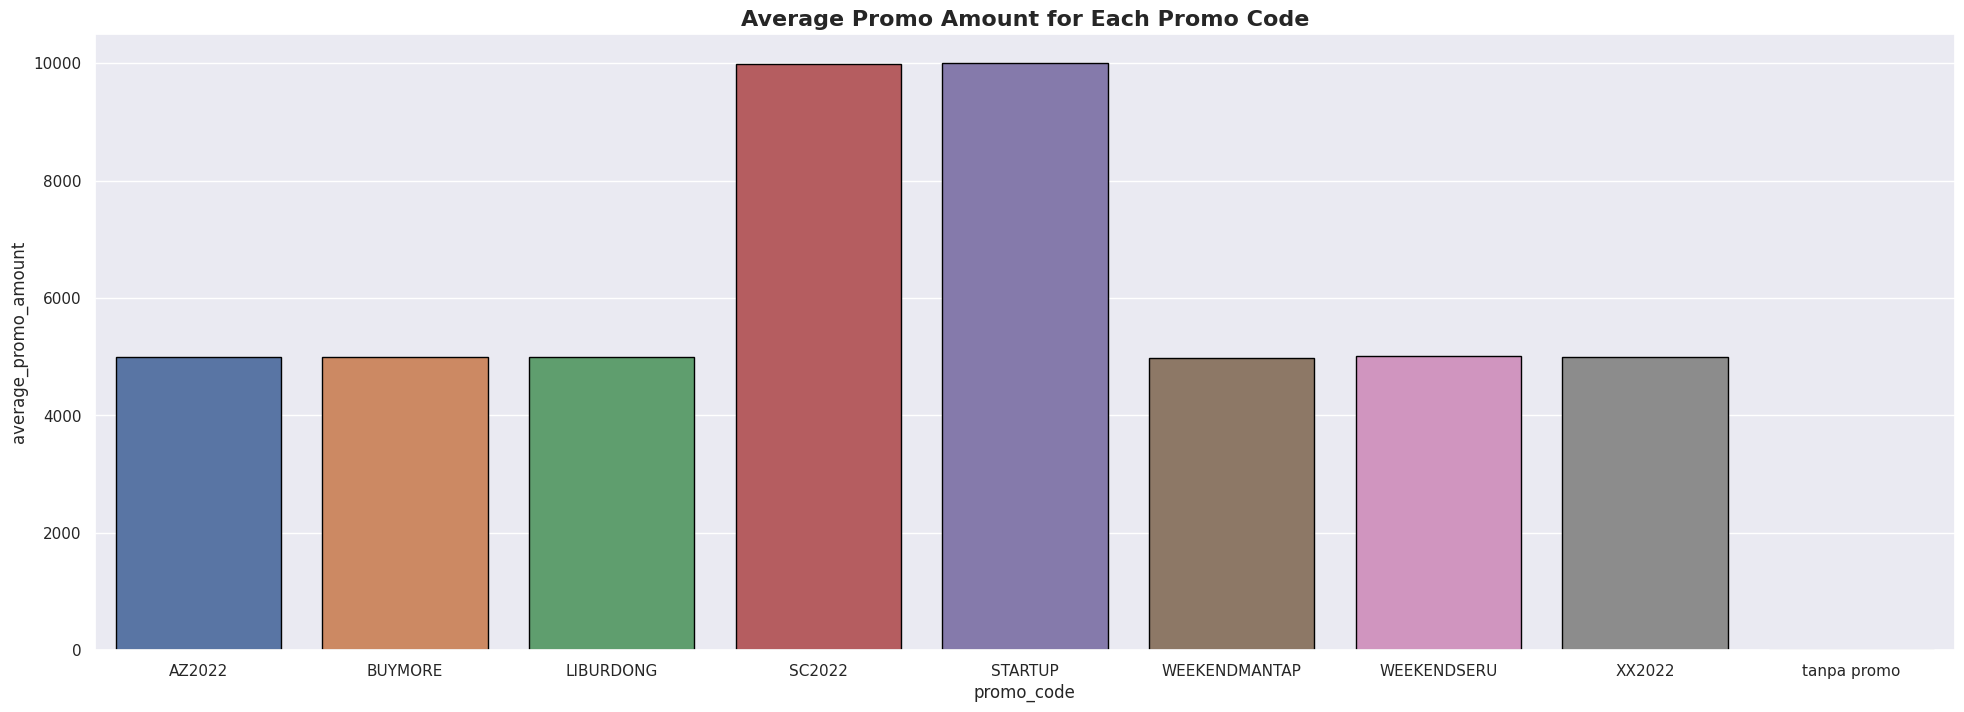

In [88]:
# mencari rata - rata jumlah promo yang digunakan untuk setiap kode promo
promo_code = transactions_no_duplicate.groupby('promo_code')['promo_amount'].mean().reset_index()
promo_code = promo_code.rename(columns = {'promo_amount' : 'average_promo_amount'})

plt.figure(figsize = (24, 8))
sns.barplot(data = promo_code, x = 'promo_code', y = 'average_promo_amount', edgecolor = 'black')
plt.title('Average Promo Amount for Each Promo Code', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

Kode promo SC2022 dan STARTUP memiliki nilai promo yang paling besar

In [89]:
# # Menghitung kategori produk yang paling banyak dibeli
# most_purchased_category = df['Product_Category'].value_counts().idxmax()

# # Visualisasi menggunakan bar chart
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(data=df, x='Product_Category', palette='pastel')
# plt.xlabel('Product Category')
# plt.ylabel('Count')
# plt.title('Most Purchased Product Category', fontweight='bold', fontdict={'fontsize': 16})
# plt.text(0, df['Product_Category'].value_counts().max(), f'Most Purchased: {most_purchased_category}', ha='left', va='bottom', fontweight='bold', fontsize=12, color='red')
# plt.xticks(rotation=45)

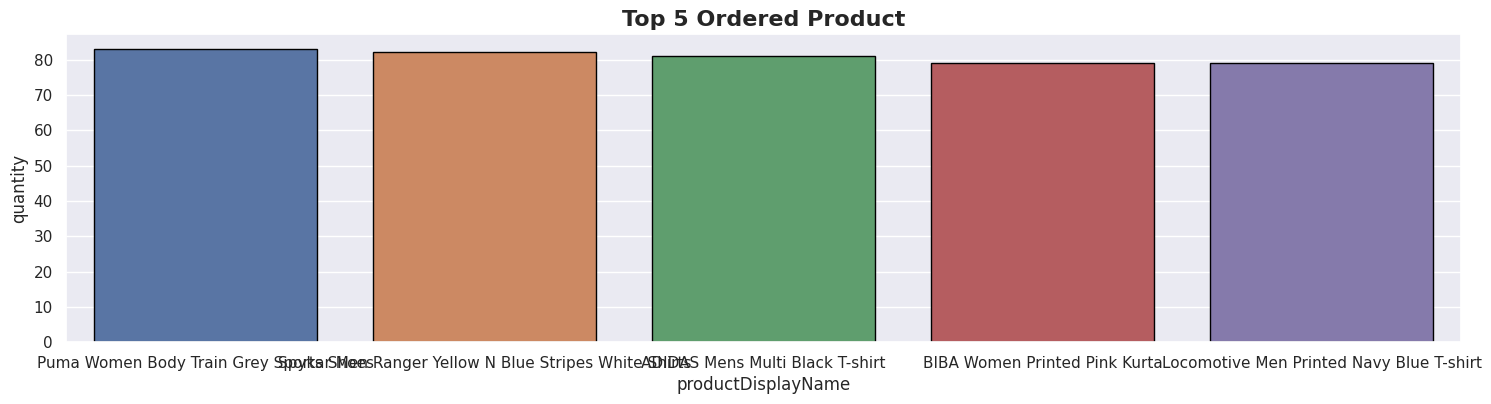

In [90]:
# mencari top 5  produk yang paling banyak diorder
product_popularity = df_transactions[df_transactions['payment_status'] == 'Success'].groupby('product_id')['quantity'].sum().reset_index()
top_product_popularity = product_popularity.sort_values('quantity', ascending = False)[:5]
top_product = top_product_popularity.merge(right = df_product[['id', 'productDisplayName']], how = 'left', left_on = 'product_id', right_on = 'id')

plt.figure(figsize = (18, 4))
sns.barplot(data = top_product, x = 'productDisplayName', y = 'quantity', edgecolor = 'black')
# sns.barplot(data = popular_product, x = 'product_id', y = 'quantity', edgecolor = 'black')
plt.title('Top 5 Ordered Product', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 8

Berikut adalah product yang paling banyak diorder pelanggan. Adidas Mens Multi Black T-Shirt adalah produk paling banyak dipesan.

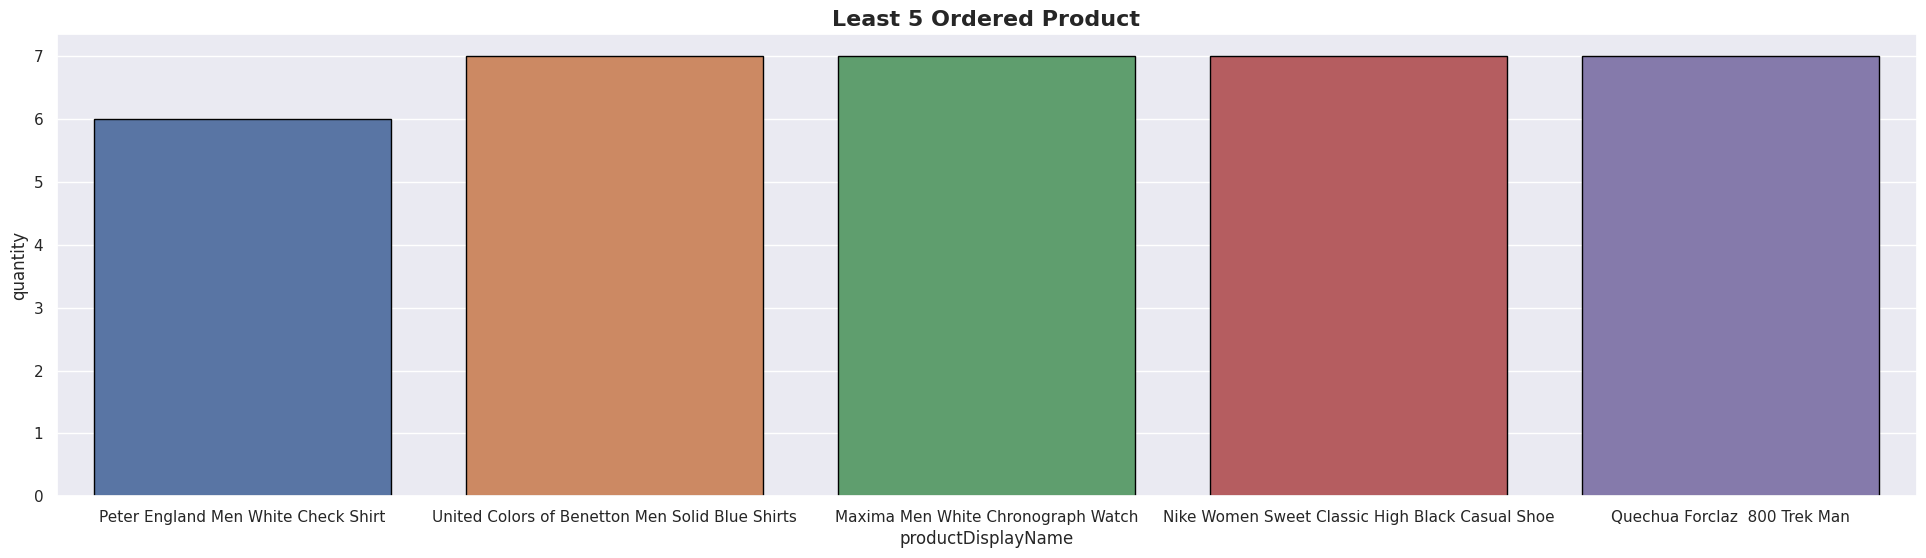

In [91]:
# mencari top 5  produk yang paling sedikit diorder
least_product_popularity = product_popularity.sort_values('quantity', ascending = True)[:5]
least_product = least_product_popularity.merge(right = df_product[['id', 'productDisplayName']], how = 'left', left_on = 'product_id', right_on = 'id')

plt.figure(figsize = (24, 6))
sns.barplot(data = least_product, x = 'productDisplayName', y = 'quantity', edgecolor = 'black')
plt.title('Least 5 Ordered Product', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

Lotto Men Sting Black Sandals adalah produk yang jarang dipesan pelanggan.

In [92]:
# # mencari shipment time
# shipment_time = transactions_no_duplicate.groupby('shipment_time')['created_at'].count().reset_index()
# shipment_time = shipment_time.rename(columns = {'created_at' : 'total_order'})

# plt.figure(figsize = (12, 6))
# sns.barplot(data = shipment_time, x = 'shipment_time', y = 'total_order', edgecolor = 'black')
# plt.title('Shipment Time', fontweight = 'bold', fontdict = {'fontsize' : 16})
# plt.rcParams['font.size'] = 10

Rata-rata pengiriman harinya berkisar dari 1 - 6 hari. Jumlah pelanggan yang memiliki pengiriman harinya 6 sangat sedikit sekali jika dibandingkan dengan yang lain. Kemungkinannya adalah pelanggan hanya bisa menoleransi pengiriman hari selama 1 - 5 hari saja.

In [93]:
df_transactions['created_at'] = df_transactions['created_at'].astype('datetime64')
df_transactions['created_year'] = df_transactions['created_at'].dt.year
df_transactions['created_month'] = df_transactions['created_at'].dt.month

<ipython-input-93-762f1f5a7595>:1: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_transactions['created_at'] = df_transactions['created_at'].astype('datetime64')


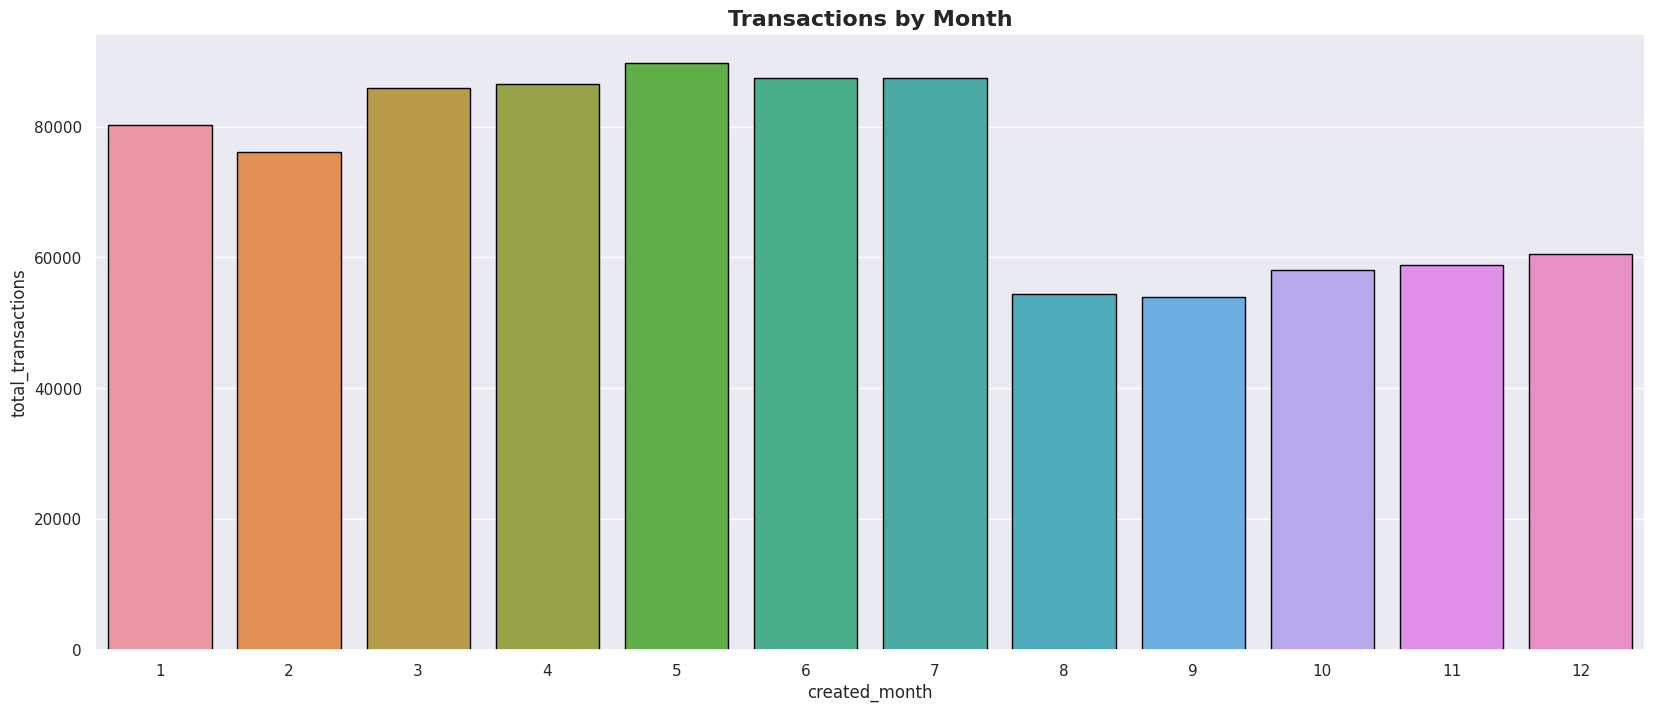

In [94]:
# mencari transaksi sukses berdasarkan bulan
transactions_success = df_transactions[df_transactions['payment_status'] == 'Success']
transactions_month = transactions_success.groupby('created_month')['created_at'].count().reset_index().rename(columns = {'created_at' : 'total_transactions'})

plt.figure(figsize = (20, 8))
sns.barplot(data = transactions_month, x = 'created_month', y = 'total_transactions', edgecolor = 'black')
plt.title('Transactions by Month', fontweight = 'bold', fontdict = {'fontsize' : 16})
plt.rcParams['font.size'] = 10

Pemberian promo pada bulan 5 dan 12 cukup kencang. Dengan catatan bulan 1 - 7 sudah mencapai tahun 2022, sedangkan bulan 8 - 12 hanya mencapai tahun 2021.

In [95]:
# transactions_promo = df_transactions[df_transactions['promo_code'].isnull() == False]
# transactions_promo = transactions_promo.drop_duplicates(['customer_id', 'created_month', 'promo_year'])

# promo_month = transactions_promo.groupby('created_month')['created_at'].count().reset_index().rename(columns = {'created_at' : 'total_promo_used'})

# plt.figure(figsize = (25, 10))
# sns.barplot(data = promo_month, x = 'created_month', y = 'total_promo_used', edgecolor = 'black')
# plt.title('Promo Used by Month', fontweight = 'bold', fontdict = {'fontsize' : 16})
# plt.rcParams['font.size'] = 10

<Axes: xlabel='CohortIndex', ylabel='CohortMonth'>

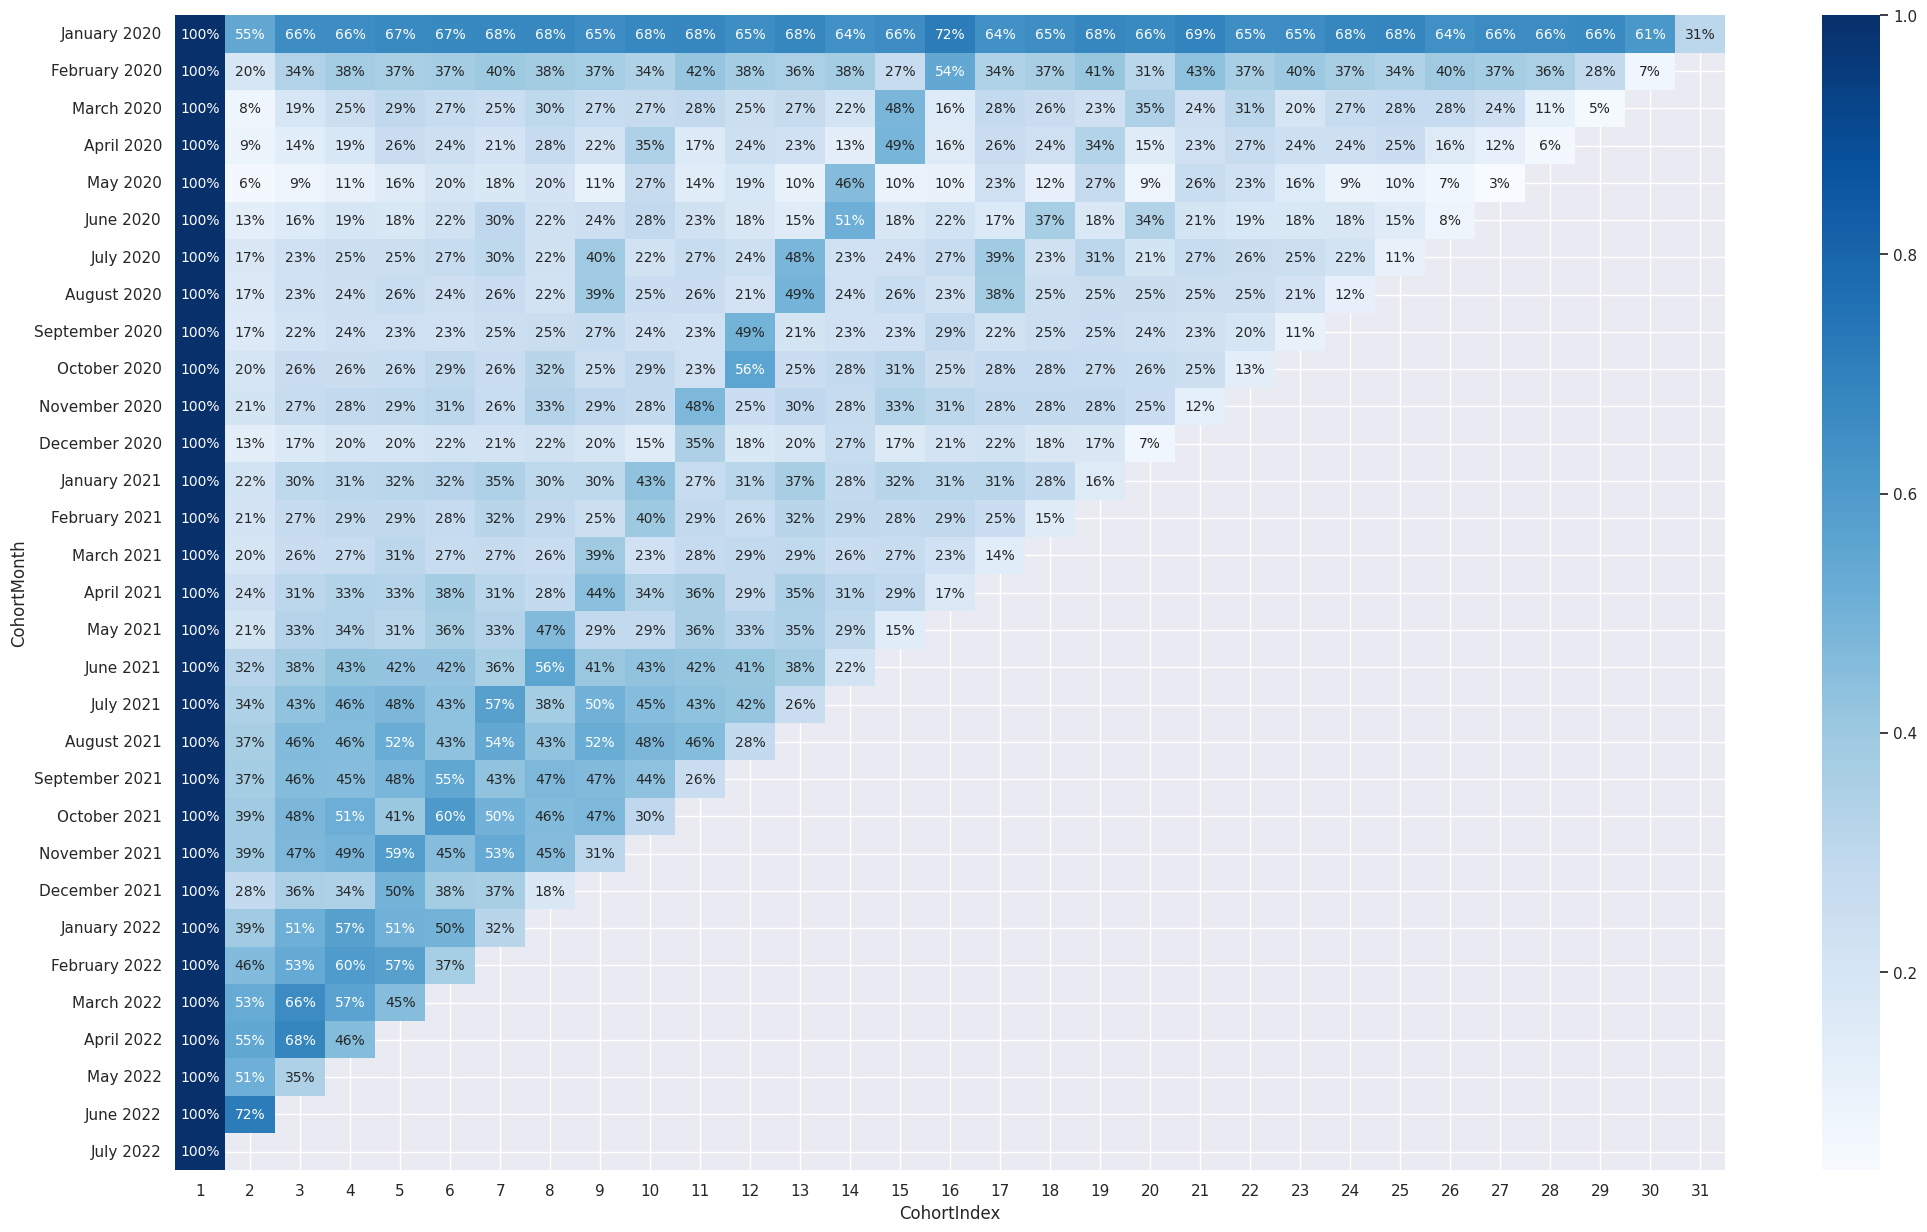

In [96]:
cohort = df_transactions[df_transactions['payment_status'] == 'Success'].copy().dropna(subset = ['customer_id'])
cohort['InvoiceMonth'] = cohort['created_at'].apply(lambda x : dt.datetime(x.year, x.month, 1))

#Create a column index with the minimum invoice date aka first time customer was acquired
cohort['CohortMonth'] =  cohort.groupby('customer_id')['InvoiceMonth'].transform('min')

# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year

# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(cohort, 'InvoiceMonth')
_,Cohort_month,Cohort_year =  get_date_elements(cohort, 'CohortMonth')

#Create a cohort index
year_diff = Invoice_year - Cohort_year
month_diff = Invoice_month - Cohort_month
cohort['CohortIndex'] = year_diff * 12 + month_diff + 1

#Count the customer ID by grouping by Cohort Month  and Cohort Index
cohort_data = cohort.groupby(['CohortMonth','CohortIndex'])['customer_id'].apply(pd.Series.nunique).reset_index()

#Create a pivot table
cohort_table = cohort_data[cohort_data['CohortMonth'] >= '2020-01-01'].pivot(index = 'CohortMonth', columns = ['CohortIndex'], values='customer_id')
cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

#Change index
cohort_table.index = cohort_table.index.strftime('%B %Y')

plt.figure(figsize = (25, 15))
sns.heatmap(cohort_table, annot = True, fmt = '.0%', cmap = 'Blues')

Transaksi di bulan Juli 2022 menurun

In [97]:
transactions_2022 = df_transactions[df_transactions['created_at'] >= '2022-01-01']

In [98]:

transactions_success = transactions_2022[transactions_2022['payment_status'] == 'Success']

def plotBarChart(title, index, values, offset=0, figsize=(17,8)):
  fig, ax = plt.subplots(figsize=figsize)

  plt.bar(index, values)

  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_x()+offset, i.get_height()*1.01,
              str(round((i.get_height()), 2)),
              color ='black')

  plt.title(title)

  # Add x, y gridlines
  ax.grid(color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)

  plt.show()

transactions_success['purchase_day'] = pd.to_datetime(transactions_success['created_at']).dt.day_name()
transactions_success['purchase_hour'] = pd.to_datetime(transactions_success['created_at']).dt.hour

<ipython-input-98-a180d5774de8>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_success['purchase_day'] = pd.to_datetime(transactions_success['created_at']).dt.day_name()
<ipython-input-98-a180d5774de8>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_success['purchase_hour'] = pd.to_datetime(transactions_success['created_at']).dt.hour


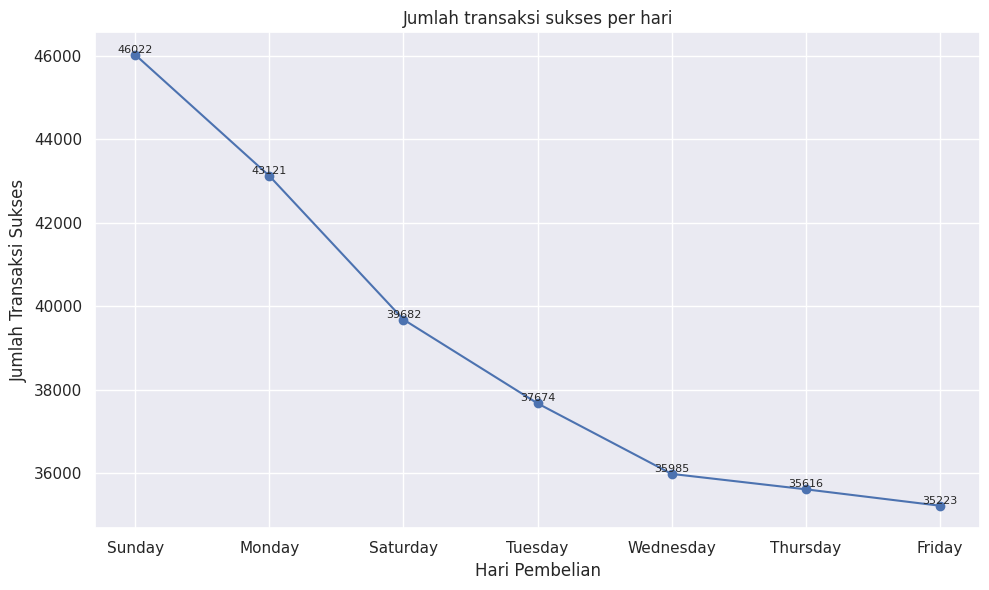

In [99]:
import matplotlib.pyplot as plt

def plotLineChart(title, x_labels, y_values, x_label_name, y_label_name):
    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, y_values, marker='o')
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.title(title)
    plt.xticks(rotation=0)

    for i, yval in enumerate(y_values):
        plt.text(x_labels[i], yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Data transaksi sukses per hari
purchase_days = transactions_success['purchase_day'].value_counts().index
purchase_counts = transactions_success['purchase_day'].value_counts().values

# Memanggil fungsi plotLineChart
plotLineChart('Jumlah transaksi sukses per hari', purchase_days, purchase_counts, 'Hari Pembelian', 'Jumlah Transaksi Sukses')


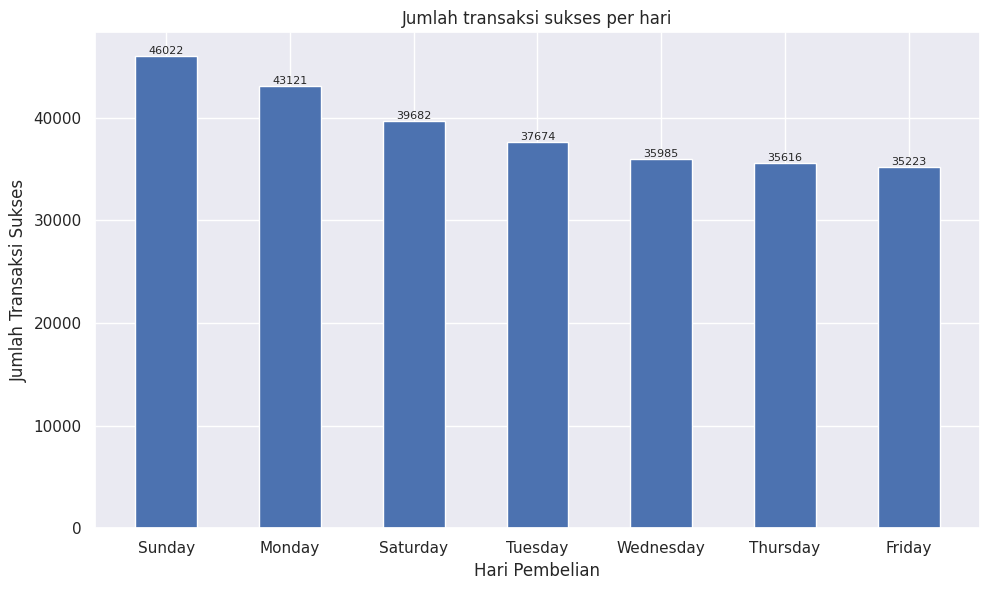

In [100]:
import matplotlib.pyplot as plt

def plotBarChart(title, x_labels, y_values, x_label_name, y_label_name, width):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_labels, y_values, width=width)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.title(title)
    plt.xticks(rotation=0)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Data transaksi sukses per hari
purchase_days = transactions_success['purchase_day'].value_counts().index
purchase_counts = transactions_success['purchase_day'].value_counts().values

# Memanggil fungsi plotBarChart dengan parameter width
plotBarChart('Jumlah transaksi sukses per hari', purchase_days, purchase_counts, 'Hari Pembelian', 'Jumlah Transaksi Sukses', 0.5)


In [101]:
# plotBarChart('Jumlah transaksi sukses per hari', transactions_success['purchase_day'].value_counts().index, transactions_success['purchase_day'].value_counts().values, .25)

Pelanggan banyak melakukan order pada hari libur

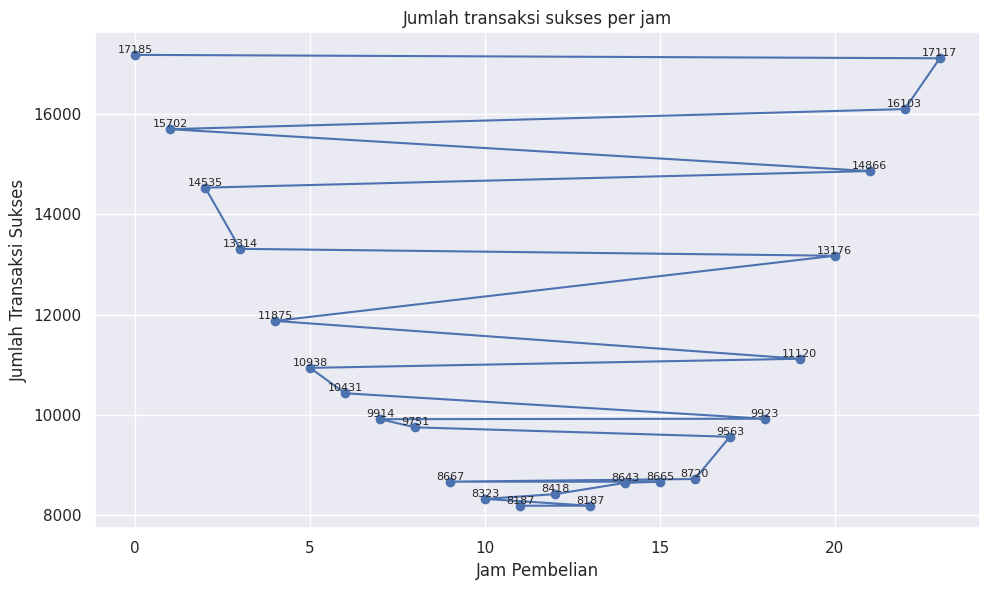

In [102]:
import matplotlib.pyplot as plt

def plotLineChart(title, x_labels, y_values, x_label_name, y_label_name):
    plt.figure(figsize=(10, 6))
    plt.plot(x_labels, y_values, marker='o')
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.title(title)
    plt.xticks(rotation=0)

    for i, yval in enumerate(y_values):
        plt.text(x_labels[i], yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Data transaksi sukses
purchase_hours = transactions_success['purchase_hour'].value_counts().index
purchase_counts = transactions_success['purchase_hour'].value_counts().values

# Memanggil fungsi plotLineChart
plotLineChart('Jumlah transaksi sukses per jam', purchase_hours, purchase_counts, 'Jam Pembelian', 'Jumlah Transaksi Sukses')

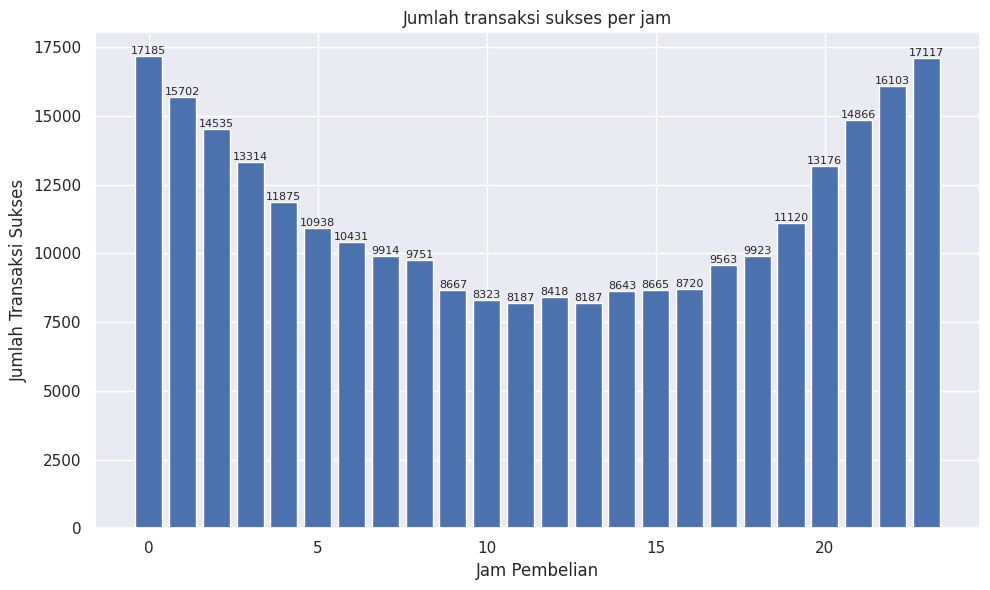

In [103]:
import matplotlib.pyplot as plt

def plotBarChart(title, x_labels, y_values, x_label_name, y_label_name):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(x_labels, y_values)
    plt.xlabel(x_label_name)
    plt.ylabel(y_label_name)
    plt.title(title)
    plt.xticks(rotation=0)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Data transaksi sukses
purchase_hours = transactions_success['purchase_hour'].value_counts().index
purchase_counts = transactions_success['purchase_hour'].value_counts().values

# Memanggil fungsi plotBarChart
plotBarChart('Jumlah transaksi sukses per jam', purchase_hours, purchase_counts, 'Jam Pembelian', 'Jumlah Transaksi Sukses')


In [104]:
# plotBarChart('Jumlah transaksi sukses per jam', transactions_success['purchase_hour'].value_counts().index, transactions_success['purchase_hour'].value_counts().values)

Pelanggan banyak melakukan order pada malam hari hingga subuh. Ketika pagi dan siang hari, mereka sedang bekerja sehingga jarang melakukan order

In [105]:
# melihat data unik di kolom payment_method
df_transactions['payment_method'].value_counts()

Credit Card    323210
Gopay          183346
OVO            181811
Debit Card     147569
LinkAja         82178
Name: payment_method, dtype: int64

In [106]:
# melihat payment method favorite customer (paling sering digunakan)
payment = df_transactions.groupby(['payment_method'])['customer_id'].count()
payment

payment_method
Credit Card    323210
Debit Card     147569
Gopay          183346
LinkAja         82178
OVO            181811
Name: customer_id, dtype: int64

<Axes: title={'center': 'Payment Method Distribution'}, xlabel='payment_method'>

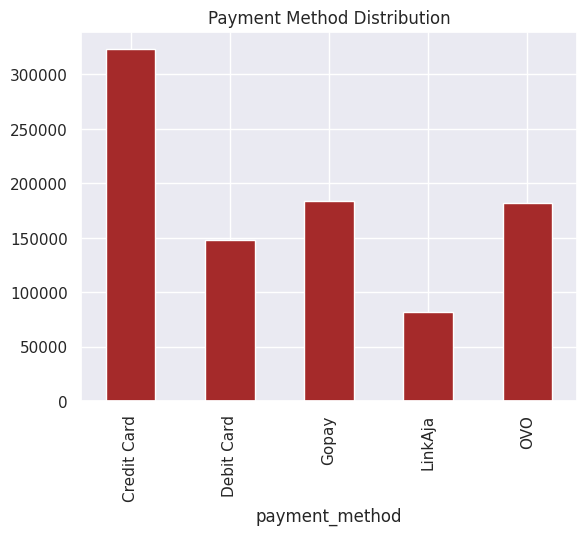

In [107]:
# memvisualisasikan data banyaknya payment method yang dipilih customer
payment.plot(kind='bar', title='Payment Method Distribution', color='brown')

Dari grafik diatas dapat diketahui bahwa payment method yang paling banyak digunakan adalah credit card, kemudian gopay. Sedangkan payment method yang sedikit digunakan adalah Link Aja.

In [108]:
# menghitung rata rata total amount berdasarkan customer
gmv = df_transactions.groupby(['customer_id'])['total_amount'].sum().reset_index()
gmv

,customer_id,total_amount
0,3,35913767
1,8,4758601
2,9,4113630
3,11,197533
4,15,1056776
...,...,...
46057,99991,791757
46058,99992,14033384
46059,99995,58958135
46060,99997,226461


In [109]:
# total amount terbanyak
gmv.max()

customer_id          99998
total_amount    1098440883
dtype: int64